# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

%matplotlib inline

In [2]:
train_o = pd.read_csv('train.csv', index_col='Id', keep_default_na = False)
test_o = pd.read_csv('test.csv', index_col='Id', keep_default_na = False)

train_o.head()

MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
Id                                                                   
1           60       RL          65     8450   Pave    NA      Reg   
2           20       RL          80     9600   Pave    NA      Reg   
3           60       RL          68    11250   Pave    NA      IR1   
4           70       RL          60     9550   Pave    NA      IR1   
5           60       RL          84    14260   Pave    NA      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0     NA    NA          NA   
2          Lvl    AllPub       FR2  ...        0     NA    NA          NA   
3          Lvl    AllPub    Inside  ...        0     NA    NA          NA   
4          Lvl    AllPub    Corner  ...        0     NA    NA          NA   
5          Lvl    AllPub       FR2  ...        0     NA    NA          NA   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

Check for duplicates

In [3]:
print(train_o.duplicated().sum())
print(test_o.duplicated().sum())

0
0


### Look through all categorical features

In [4]:
for column in train_o.columns:
    if train_o[column].dtype == 'object':
        print(column)
        print(np.unique(train_o[column], return_counts = True))
        print('-'*50)

MSZoning
(array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object), array([  10,   65,   16, 1151,  218], dtype=int64))
--------------------------------------------------
LotFrontage
(array(['100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '114', '115', '116', '118', '120',
       '121', '122', '124', '128', '129', '130', '134', '137', '138',
       '140', '141', '144', '149', '150', '152', '153', '160', '168',
       '174', '182', '21', '24', '30', '313', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
       '91', '92', '93', '94', '95', '96', '97', '98', '99', 'NA'],
      dtype=object), array([ 16, 

In [5]:
for column in test_o.columns:
    if test_o[column].dtype == 'object':
        print(column)
        print(np.unique(test_o[column], return_counts = True))
        print('-'*50)

MSZoning
(array(['C (all)', 'FV', 'NA', 'RH', 'RL', 'RM'], dtype=object), array([  15,   74,    4,   10, 1114,  242], dtype=int64))
--------------------------------------------------
LotFrontage
(array(['100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '112', '113', '114', '115', '117', '118', '119',
       '120', '121', '123', '124', '125', '126', '128', '129', '130',
       '131', '133', '134', '135', '136', '140', '149', '150', '155',
       '160', '195', '200', '21', '22', '24', '25', '26', '28', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98

Modify copies of the datasets

In [6]:
train_m = train_o.copy()
test_m = test_o.copy()

### Fix column data type and resolve NAs

In [7]:
# MSSubClass shouldn't be numerical
train_m.MSSubClass = train_m.MSSubClass.astype('str')
test_m.MSSubClass = test_m.MSSubClass.astype('str')
train_m.MSSubClass = train_m.MSSubClass.astype('category')
test_m.MSSubClass = test_m.MSSubClass.astype('category')

# Convert LotFrontage column to numerical
train_m.loc[train_m['LotFrontage'] == 'NA', ['LotFrontage']] = np.nan
test_m.loc[test_m['LotFrontage'] == 'NA', ['LotFrontage']] = np.nan

train_m.LotFrontage = train_m.LotFrontage.astype('float')
test_m.LotFrontage = test_m.LotFrontage.astype('float')

# Test set has 2 NAs in Utilities. Allpub is by far the most common so impute those as that.
test_m.loc[test_m['Utilities'] == 'NA', ['Utilities']] = 'AllPub'

# Change NAs in GarageYrBlt to YearBuilt and convert column to numerical
train_m.loc[train_m.GarageYrBlt == 'NA',['GarageYrBlt']] = train_m.YearBuilt.astype('str')
test_m.loc[test_m.GarageYrBlt == 'NA',['GarageYrBlt']] = test_m.YearBuilt.astype('str')

train_m.GarageYrBlt = train_m.GarageYrBlt.astype('int64')
test_m.GarageYrBlt = test_m.GarageYrBlt.astype('int64')

# Test set has one entry with Exterior1st Exterior2nd as NAs. Impute with most common VinylSd for both
test_m.loc[[2152], ['Exterior1st', 'Exterior2nd']] = 'VinylSd'

# A few MasVnrType and MasVnrArea NAs. For cases where NAs are for both, impute with None and 0. For one entry with area, impute type as BrkFace since most common.
train_m.loc[train_m['MasVnrArea'] == 'NA', ['MasVnrType', 'MasVnrArea']] = ['None', '0']
test_m.loc[test_m['MasVnrArea'] == 'NA', ['MasVnrType', 'MasVnrArea']] = ['None', '0']
test_m.loc[[2611], ['MasVnrType']] = 'BrkFace'

# Convert MasVnrArea to numerical
train_m.MasVnrArea = train_m.MasVnrArea.astype('int64')
test_m.MasVnrArea = test_m.MasVnrArea.astype('int64')

# Test set has some entries with no basement but values aren't 0
test_m.loc[[2121], ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = '0'
test_m.loc[[2189], ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = '0'

test_m[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = test_m[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].astype('int64')

# Test set has two NAs in Functional, impute as Typ
test_m.loc[test_m['Functional'] == 'NA', ['Functional']] = 'Typ'

# Test set has one NA for KitchenQual, impute as TA
test_m.loc[test_m['KitchenQual'] == 'NA', ['KitchenQual']] = 'TA'

# Test set has one entry with GarageCars and GarageArea as NA
test_m.loc[[2577], ['GarageCars', 'GarageArea']] = '0'
test_m.loc[[2577], ['GarageType']] = 'NA'

test_m[['GarageCars','GarageArea']] = test_m[['GarageCars','GarageArea']].astype('int64')

#### LotFrontage

LotFrontage has a lot of missing data and imputing isn't necessarily that trivial.

Logically speaking, should be relatively highly correlated to LotArea. Study scatter plot to see if this is indeed the case.

Only look at units with LotArea <= 20000 to avoid outliers and only LotShapes of Reg and IR1 since most units are those two.

In [8]:
LF_df_train = train_m[['LotFrontage', 'LotArea', 'LotShape']].loc[(train_m['LotFrontage'] != 'NA') & (train_m['LotShape'].isin(['Reg', 'IR1'])) & (train_m['LotArea'] <= 20000)].dropna()
LF_df_test = test_m[['LotFrontage', 'LotArea', 'LotShape']].loc[(test_m['LotFrontage'] != 'NA') & (test_m['LotShape'].isin(['Reg', 'IR1'])) & (test_m['LotArea'] <= 20000)].dropna()

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

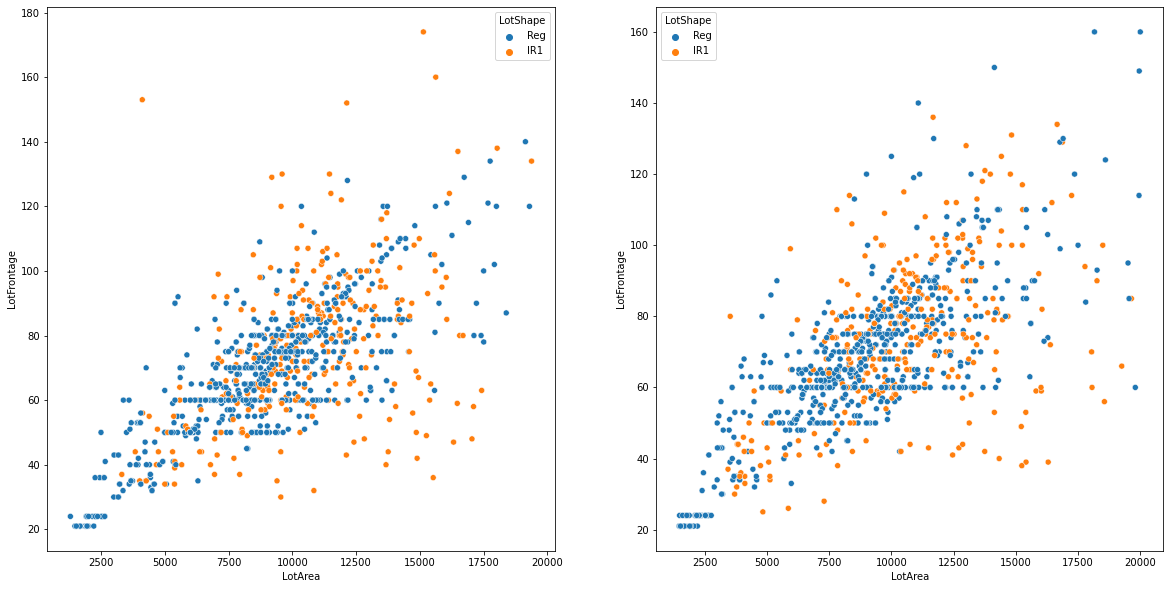

In [9]:
f, axes = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(y = LF_df_train['LotFrontage'].astype('int64'), x = LF_df_train["LotArea"], data = LF_df_train, hue="LotShape", ax=axes[0])
sns.scatterplot(y = LF_df_test['LotFrontage'].astype('int64'), x = LF_df_test["LotArea"], data = LF_df_test, hue="LotShape", ax=axes[1])

For LotShape = Reg, the relationship appears to be fairly linear. IR1 is much more random.

Will do regression on all LotShape = Reg entries and impute missing with predicted value. This will introduce multicollinearity issues but will deal with it later.

In [10]:
from sklearn.linear_model import LinearRegression

df = pd.concat([train_m.loc[train_m['LotShape'] == 'Reg', ['LotFrontage', 'LotArea']], test_m.loc[test_m['LotShape'] == 'Reg', ['LotFrontage', 'LotArea']]])
df = df.dropna()

lm = LinearRegression()

lm.fit(df[['LotArea']], df['LotFrontage'])

train_m.loc[train_m['LotFrontage'].isna(), ['LotFrontage']] = lm.predict(train_m.loc[train_m['LotFrontage'].isna(), ['LotArea']])
test_m.loc[test_m['LotFrontage'].isna(), ['LotFrontage']] = lm.predict(test_m.loc[test_m['LotFrontage'].isna(), ['LotArea']])

### Some Feature Engineering

Some of the features can be transformed to be more logical or can be combined with others to reduce dimensionality.

#### Bathrooms

For simplicity sake, will just consider half bathrooms to be 0.5 bathrooms and add to full bathrooms.

In [11]:
train_m['BsmtBath'] = train_m['BsmtFullBath']+train_m['BsmtHalfBath']*0.5
test_m['BsmtBath'] = test_m['BsmtFullBath']+test_m['BsmtHalfBath']*0.5
train_m = train_m.drop(['BsmtFullBath', 'BsmtHalfBath'], axis = 1)
test_m = test_m.drop(['BsmtFullBath', 'BsmtHalfBath'], axis = 1)

train_m['Bath'] = train_m['FullBath']+train_m['HalfBath']*0.5
test_m['Bath'] = test_m['FullBath']+test_m['HalfBath']*0.5
train_m = train_m.drop(['FullBath', 'HalfBath'], axis = 1)
test_m = test_m.drop(['FullBath', 'HalfBath'], axis = 1)

#### YearRemodAdd

Just simplify to whether property was remodeled or not.

In [12]:
train_m['Remod'] = np.where(train_m['YearRemodAdd'] == train_m['YearBuilt'], 0, 1)
test_m['Remod'] = np.where(test_m['YearRemodAdd'] == test_m['YearBuilt'], 0, 1)

train_m = train_m.drop(['YearRemodAdd'], axis = 1)
test_m = test_m.drop(['YearRemodAdd'], axis = 1)

#### YearBuilt and YrSold

YearBuilt and YrSold makes more sense if converted to age of property when sold.

Convert YrSold to categorical since the factor being evaluated is really the economy and real estate market during the year. Perhaps could argue reduction in purchasing power reduces year to year due to inflation but cannot claim it's a certainty nor that the degree is consistent.

In [13]:
train_m['AgeSold'] = train_m['YrSold']-train_m['YearBuilt']
test_m['AgeSold'] = test_m['YrSold']-test_m['YearBuilt']

train_m['YrSold'] = train_m['YrSold'].astype('str')
test_m['YrSold'] = test_m['YrSold'].astype('str')
train_m['YrSold'] = train_m['YrSold'].astype('category')
test_m['YrSold'] = test_m['YrSold'].astype('category')

train_m = train_m.drop(['YearBuilt'], axis = 1)
test_m = test_m.drop(['YearBuilt'], axis = 1)

#### MoSold

MoSold should be categorical. Reduce to quarters of the year to reduce dimensionality.

In [14]:
train_m['QtrSold'] = train_m['MoSold'].replace([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], [1, 2, 3, 4])
test_m['QtrSold'] = test_m['MoSold'].replace([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], [1, 2, 3, 4])

train_m['QtrSold'] = train_m['QtrSold'].astype('str')
test_m['QtrSold'] = test_m['QtrSold'].astype('str')
train_m['QtrSold'] = train_m['QtrSold'].astype('category')
test_m['QtrSold'] = test_m['QtrSold'].astype('category')

train_m = train_m.drop(['MoSold'], axis = 1)
test_m = test_m.drop(['MoSold'], axis = 1)

#### GrLivArea & TotalBsmtSF

GrLivArea is redundant since it is the sum of 1stFlrSF, 2ndFlrSF and LowQualFinSF.


TotalBsmtSF is redundant since it is the sum of BsmtFinSF1, BsmtFinSF2 and BsmtUnfSF.


<AxesSubplot:xlabel='TotalBsmtSF'>

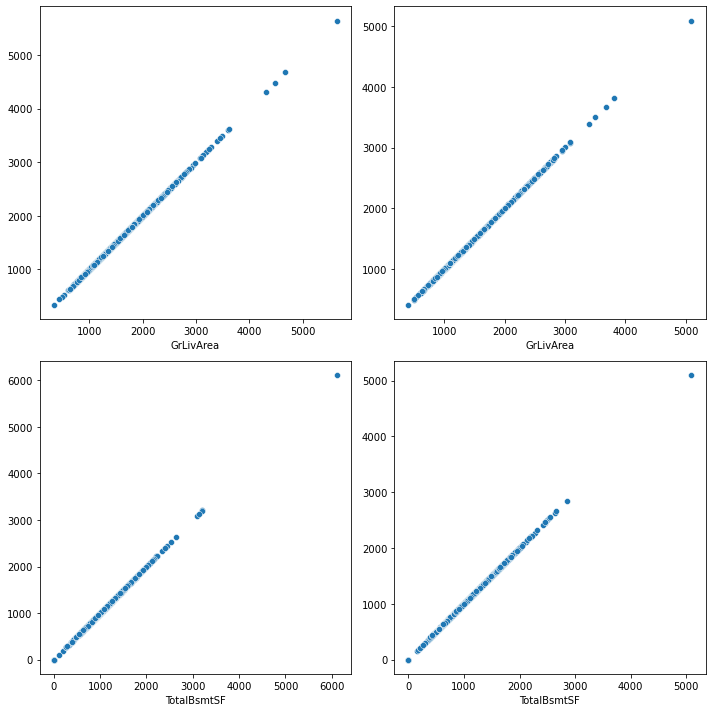

In [15]:
f, axes = plt.subplots(2, 2, figsize=(10,10))
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(y = train_m['1stFlrSF']+train_m['2ndFlrSF']+train_m['LowQualFinSF'], x = train_m['GrLivArea'], ax=axes[0, 0])
sns.scatterplot(y = test_m['1stFlrSF']+test_m['2ndFlrSF']+test_m['LowQualFinSF'], x = test_m['GrLivArea'], ax=axes[0, 1])

sns.scatterplot(y = train_m['BsmtFinSF1']+train_m['BsmtFinSF2']+train_m['BsmtUnfSF'], x = train_m['TotalBsmtSF'], ax=axes[1, 0])
sns.scatterplot(y = test_m['BsmtFinSF1']+test_m['BsmtFinSF2']+test_m['BsmtUnfSF'], x = test_m['TotalBsmtSF'], ax=axes[1, 1])

In [16]:
train_m = train_m.drop(['GrLivArea', 'TotalBsmtSF'], axis = 1)
test_m = test_m.drop(['GrLivArea', 'TotalBsmtSF'], axis = 1)

#### TotRmsAbvGrd

Convert to number of non-bedroom or kitchen rooms.

In [17]:
train_m['OtherRms'] = train_m['TotRmsAbvGrd']-(train_m['BedroomAbvGr']+train_m['KitchenAbvGr'])
test_m['OtherRms'] = test_m['TotRmsAbvGrd']-(test_m['BedroomAbvGr']+test_m['KitchenAbvGr'])

train_m = train_m.drop(['TotRmsAbvGrd'], axis = 1)
test_m = test_m.drop(['TotRmsAbvGrd'], axis = 1)

## Export Fixed Data

In [18]:
train_m.to_excel('train_fixed.xlsx')
test_m.to_excel('test_fixed.xlsx')

# Linear Regression / Regularized Linear Regression

## Data Exploration

### Multicollinearity

Multicollinearity results in coefficients with higher standard errors and causes the model to become unstable. Therefore, need to check for and resolve multicollinearity issues between features.

Plot correlation matrix and see if some highly correlated features can/should be removed.

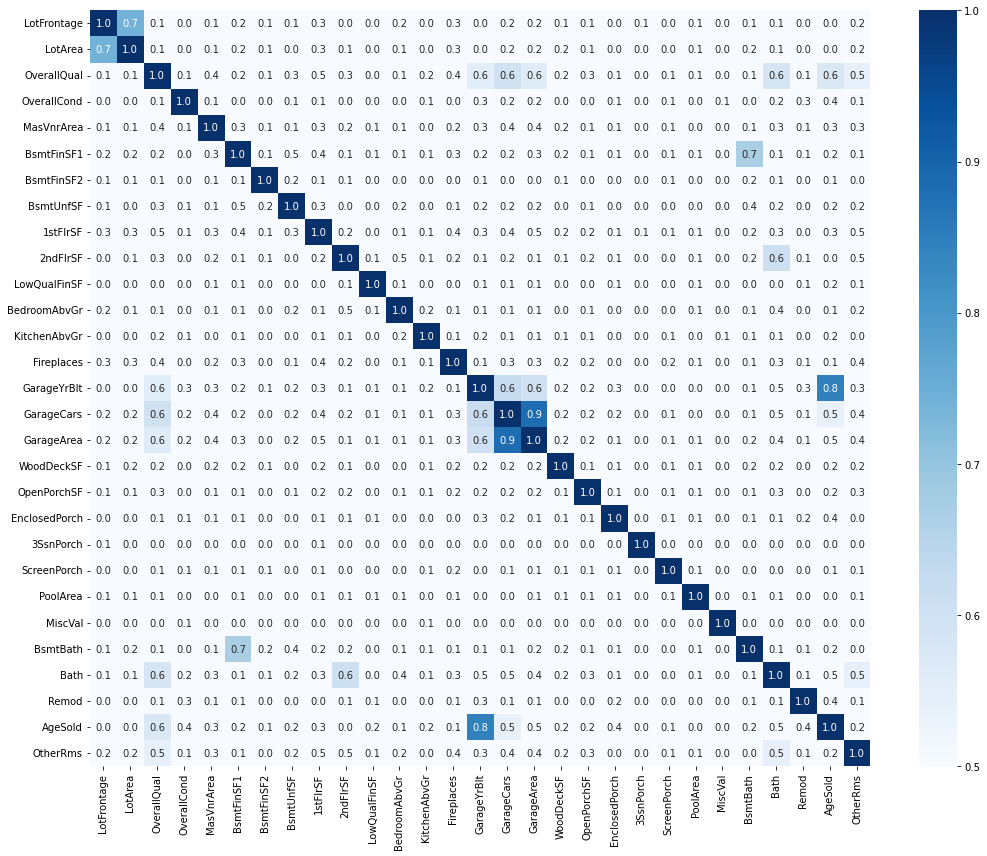

In [19]:
from pandas.plotting import scatter_matrix

corrMatrix = train_m.drop('SalePrice', axis = 1).corr().abs()

plt.figure(figsize=(15, 12))
sns.heatmap(corrMatrix, annot=True, vmin=0.5, fmt='.1f', cmap='Blues')

plt.show()

Make a table showing feature pairs that have correlation values > 0.7. Also make table showing correlation of each 

In [20]:
corr_df = pd.DataFrame(corrMatrix.unstack(), columns = ['Correlation'])
corr_df[(corr_df > 0.7) & (corr_df != 1)].dropna().drop_duplicates()

Correlation
LotFrontage LotArea        0.740549
GarageYrBlt AgeSold        0.844254
GarageCars  GarageArea     0.882475

In [21]:
target_corr = train_m.corr().abs()[['SalePrice']].sort_values('SalePrice', ascending = False)
target_corr

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GarageCars      0.640409
OtherRms        0.631425
GarageArea      0.623431
1stFlrSF        0.605852
Bath            0.597966
AgeSold         0.523350
GarageYrBlt     0.508043
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotArea         0.263843
LotFrontage     0.256963
BsmtBath        0.224953
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
KitchenAbvGr    0.135907
EnclosedPorch   0.128578
ScreenPorch     0.111447
PoolArea        0.092404
OverallCond     0.077856
3SsnPorch       0.044584
LowQualFinSF    0.025606
Remod           0.021933
MiscVal         0.021190
BsmtFinSF2      0.011378

As shown, few feature pairs are highly correlated.

- LotFrontage & LotArea. This is expected, especially given that LotFrontage NA's were imputed with linear regression with LotArea as the independent variable. Will remove LotFrontage due to many NAs as well as LotArea logically being more important with higher correlation to target variable.


- GarageYrBlt & AgeSold. This is expected since for a vast majority of houses the year built will be the same. Will remove GarageYrBlt since AgeSold is logically more important with higher correlation to target variable.


- GarageCars & GarageArea. This is expected since garage size in car capacity is directly indicative of the garage area. Will remove GarageArea	since GarageCars has higher correlation to target variable.

In [22]:
train_mm = train_m.drop(['LotFrontage', 'GarageYrBlt', 'GarageArea'], axis = 1)
test_mm = test_m.drop(['LotFrontage', 'GarageYrBlt', 'GarageArea'], axis = 1)

### Normality

The assumption that residuals are normally distributed can be violated due to presence of outliers as well as non-normally distributed variables.

#### SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

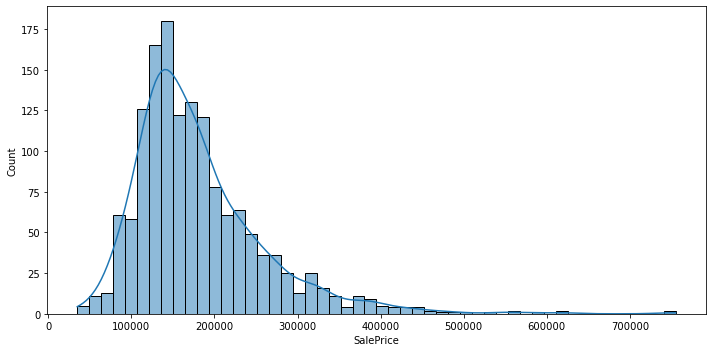

In [23]:
f, axes = plt.subplots(figsize=(10,5))
sns.histplot(train_mm['SalePrice'], kde=True, bins=50)

SalesPrice is clearly skewed and not normally distributed. Apply log transformation.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

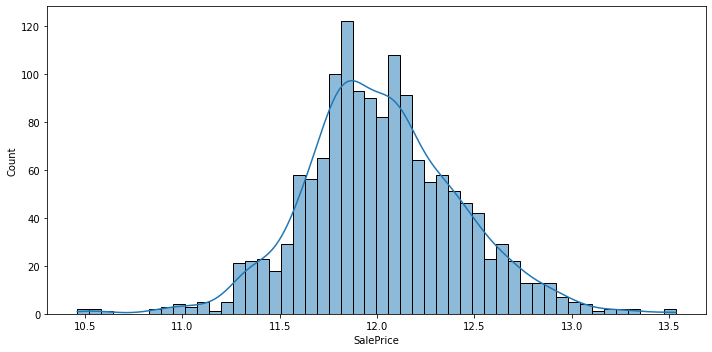

In [24]:
train_mm['SalePrice'] = np.log(train_mm['SalePrice'])

f, axes = plt.subplots(figsize=(10,5))
sns.histplot(train_mm['SalePrice'], kde=True, bins=50)

#### 1stFlrSF

Features technically do not need to be normally distributed, but the residuals should be. Will check after running model if assumption is satisfied and transform features to be more normally distributed if necessary.

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

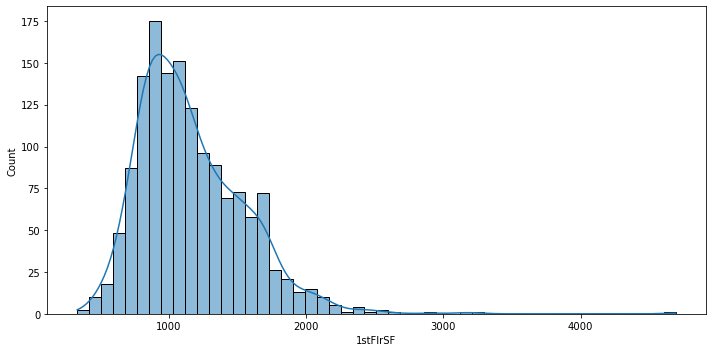

In [25]:
f, axes = plt.subplots(figsize=(10,5))
sns.histplot(train_mm['1stFlrSF'], kde=True, bins=50)

In [26]:
# train_m['1stFlrSF'] = np.log(train_m['1stFlrSF'])

# f, axes = plt.subplots(figsize=(10,5))
# sns.histplot(train_m['1stFlrSF'], kde=True, bins=50)

#### Check for outliers

Check for outliers with the top 5 features with highest correlation to sale price.

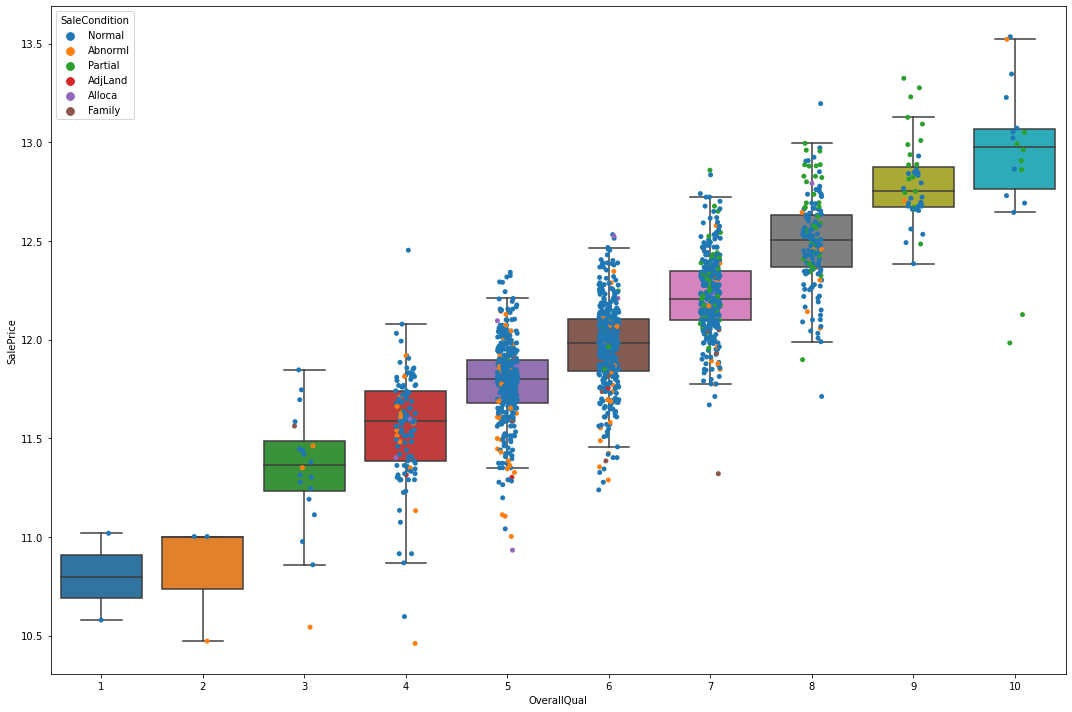

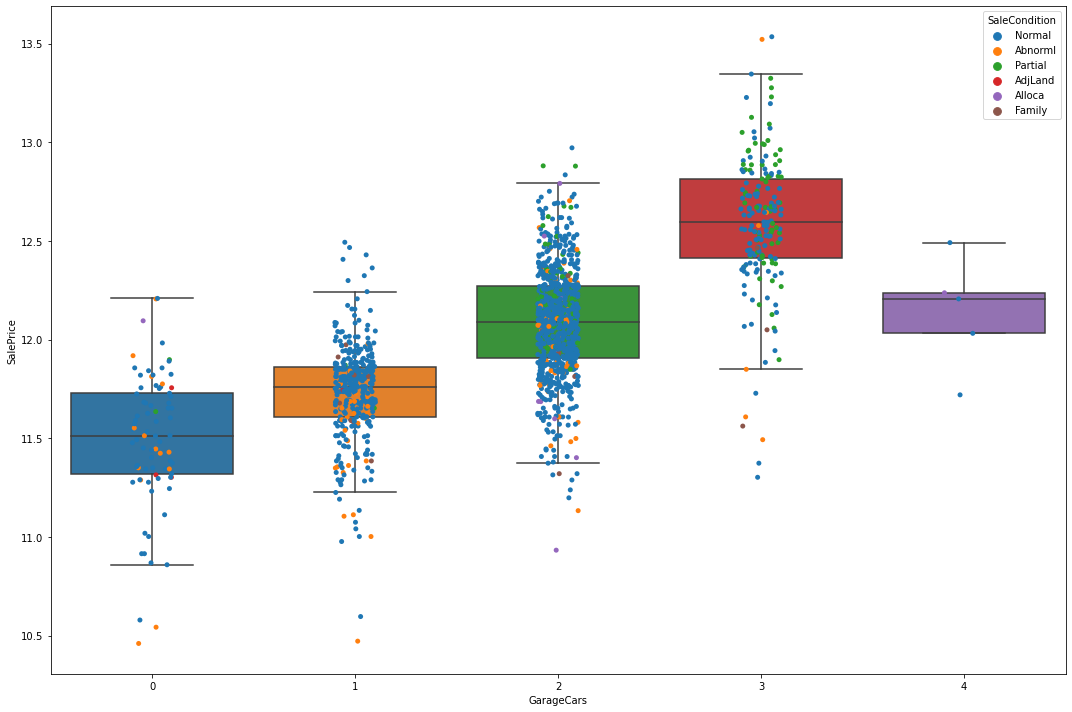

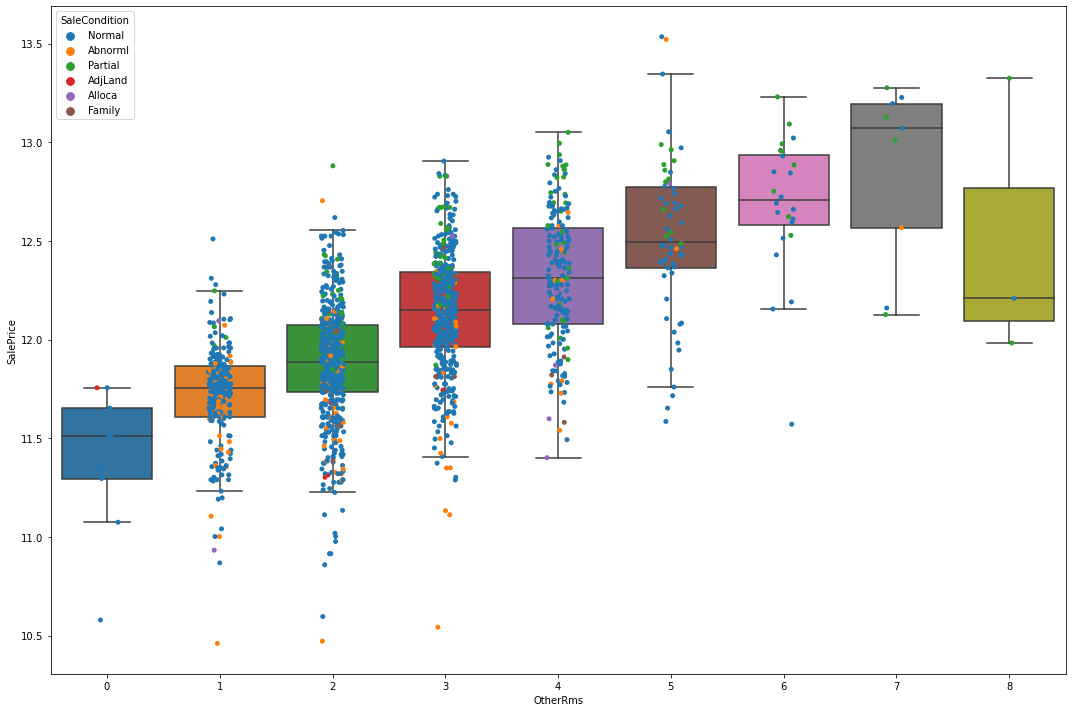

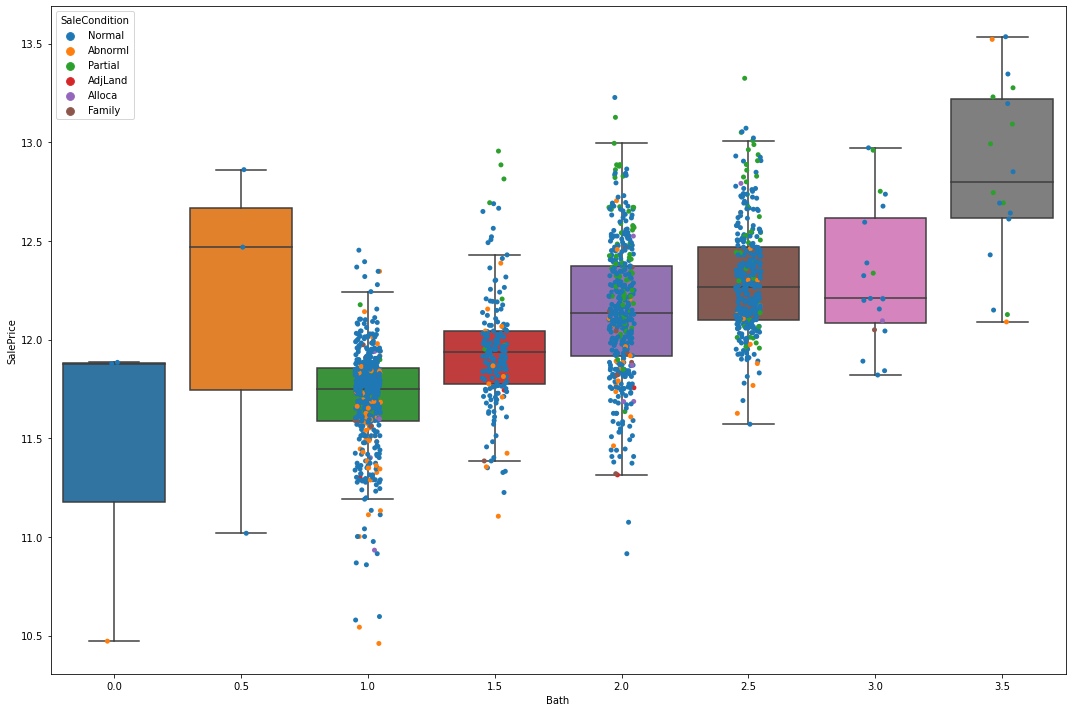

In [27]:
topordfeats = ['OverallQual', 'GarageCars', 'OtherRms', 'Bath']

for i, feat in enumerate(topordfeats):
    f, axes = plt.subplots(figsize=(15,10))
    sns.boxplot(y = 'SalePrice', x = feat, data = train_mm, showfliers = False)
    sns.stripplot(y = 'SalePrice', x = feat, data = train_mm, hue='SaleCondition')

As shown especially as a function of OverallQual, there are a few outliers that have non-normal SaleCondition that probably should be removed. Create a copy of data with outliers removed (original can be modeled for comparison). For each of the 4 top ordinal features, remove data points below 0.5 percentile and above 99.5 percentile.\
*Note: Doing so can remove enough points such that certain feature values don't have any entries, such as OverallQual of 1 or 2. Can implement method where if group has less than a certain count then do not remove outliers but will just go with this method for now.

In [28]:
def not_outlier(s):
    lower_limit = s.quantile(0.001)
    upper_limit = s.quantile(0.999)
    return s.between(lower_limit, upper_limit)

In [29]:
train_nooutlier = train_mm.copy()
for feat in topordfeats:  
    train_nooutlier = train_nooutlier[train_nooutlier.groupby(feat)['SalePrice'].apply(not_outlier)]

In [30]:
# # Use this if do not want to remove outliers if data points in group is <3.

# for feat in topordfeats:
#     filtered_out = train_m.groupby(feat).filter(lambda x: x['SalePrice'].count() <= 3)
    
#     filtered = train_m.groupby(feat).filter(lambda x: x['SalePrice'].count() > 3)
#     train_nooutlier = filtered[filtered.groupby(feat)['SalePrice'].apply(not_outlier)]
#     train_m = pd.concat([train_nooutlier, filtered_out], axis = 0)

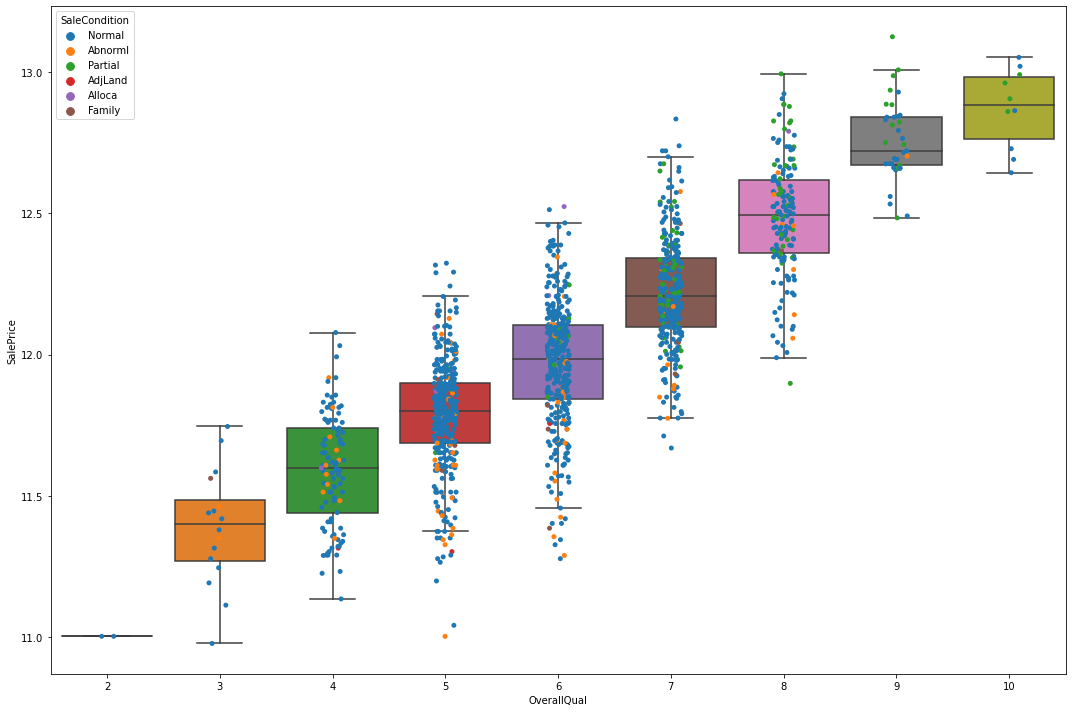

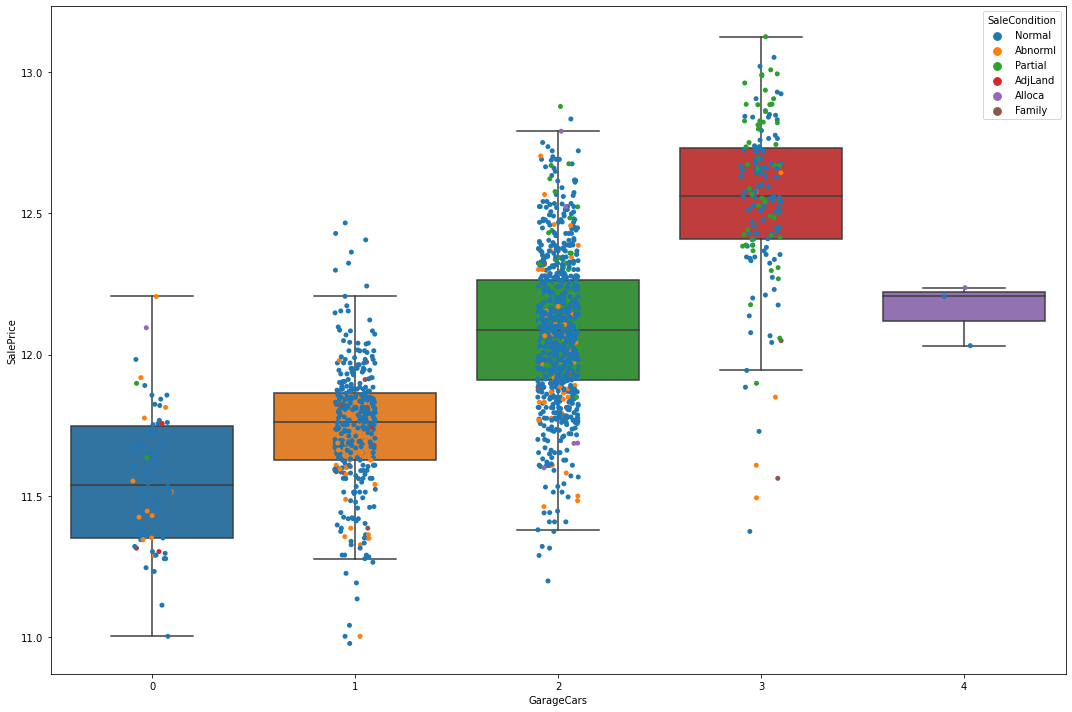

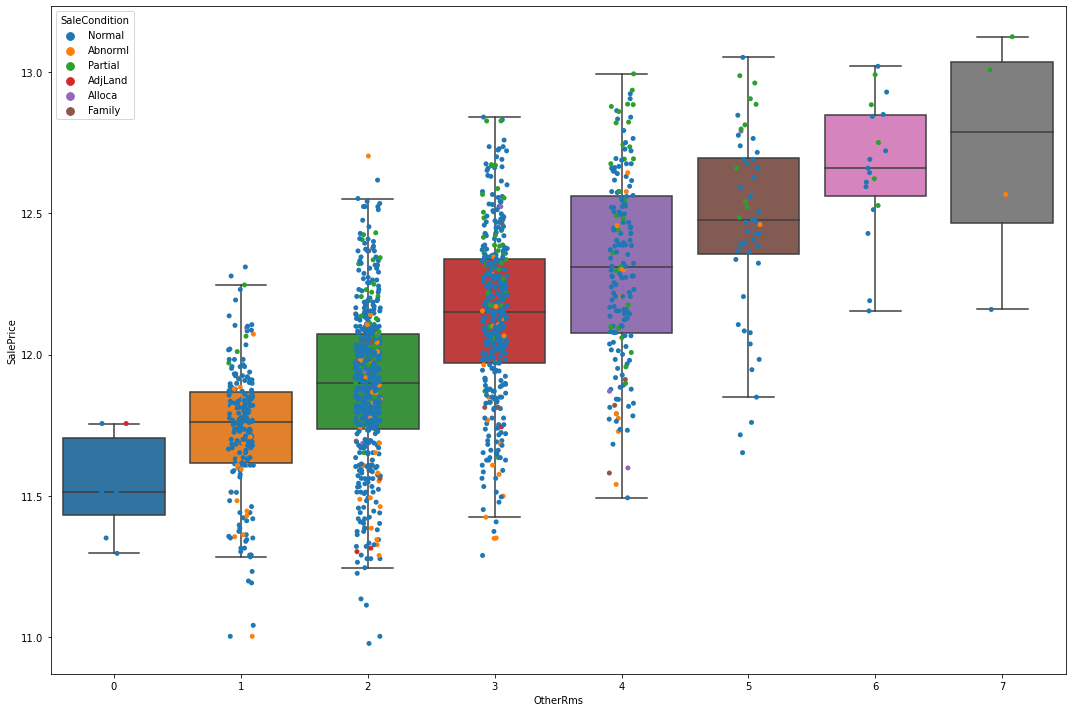

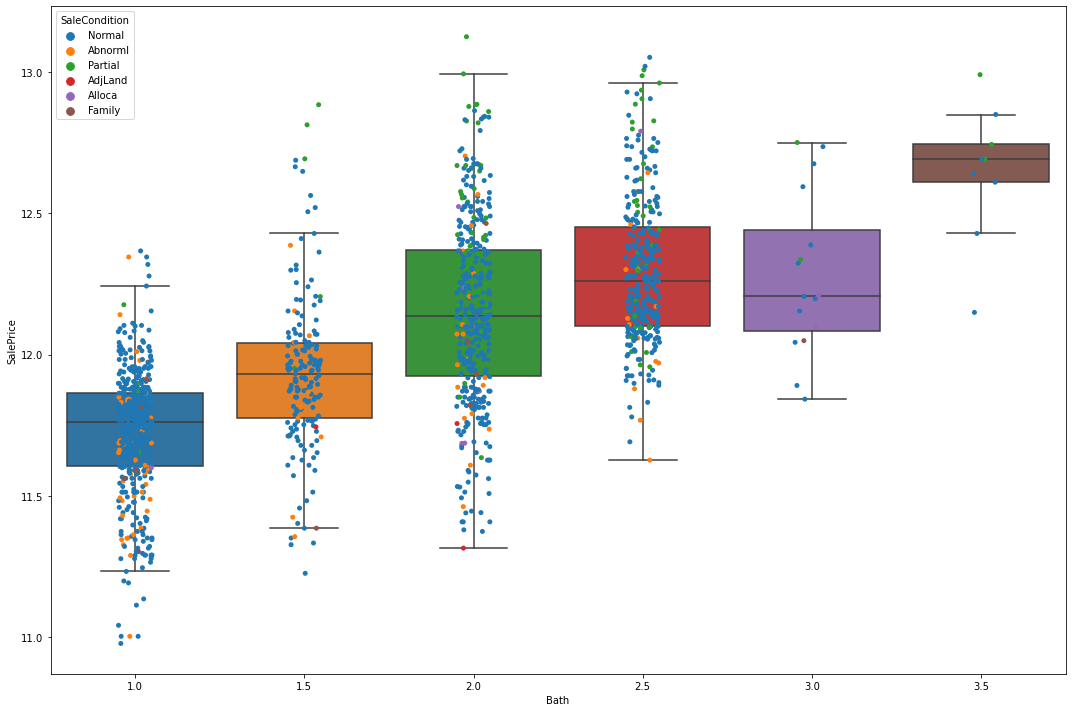

In [31]:
for i, feat in enumerate(topordfeats):
    f, axes = plt.subplots(figsize=(15,10))
    sns.boxplot(y = 'SalePrice', x = feat, data = train_nooutlier, showfliers = False)
    sns.stripplot(y = 'SalePrice', x = feat, data = train_nooutlier, hue='SaleCondition')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

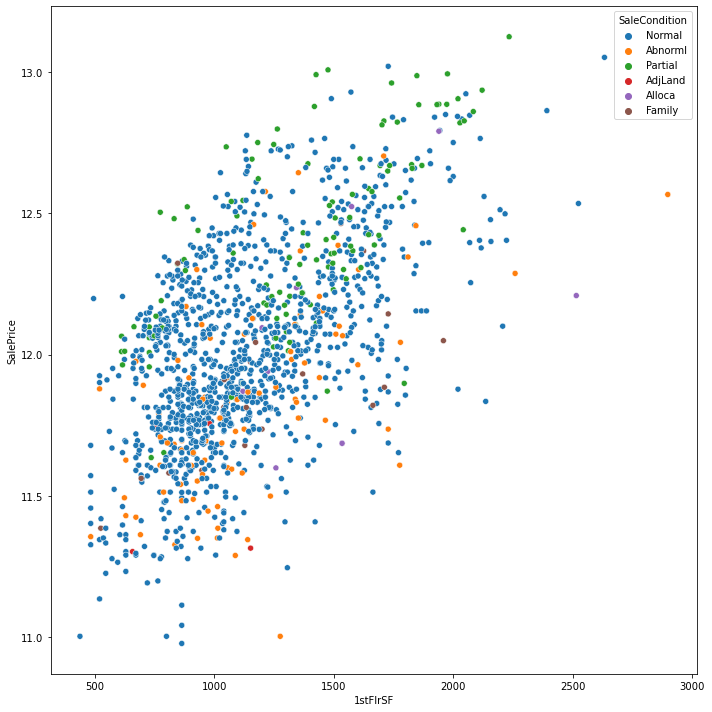

In [32]:
# 1stFlrSF
f, axes = plt.subplots(figsize=(10,10))
sns.scatterplot(y = 'SalePrice', x = '1stFlrSF', data = train_nooutlier, hue='SaleCondition')

Looks okay, will not remove any more data points.

## Encode Ordinal Categorical Features

In [33]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

ord_fea = ['LotShape', 
           'Utilities', 
           'LandSlope', 
           'ExterQual', 
           'ExterCond', 
           'BsmtQual', 
           'BsmtCond', 
           'BsmtExposure', 
           'BsmtFinType1', 
           'BsmtFinType2', 
           'HeatingQC', 
           'KitchenQual', 
           'Functional', 
           'FireplaceQu', 
           'GarageFinish', 
           'GarageQual', 
           'GarageCond', 
           'PavedDrive', 
           'PoolQC', 
           'Fence']

ord_fea_cat = [None]*len(ord_fea)

ord_fea_cat[0] = ['IR3', 'IR2', 'IR1', 'Reg']
ord_fea_cat[1] = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
ord_fea_cat[2] = ['Sev', 'Mod', 'Gtl']
ord_fea_cat[3] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[4] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[5] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[6] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[7] = ['NA', 'No', 'Mn', 'Av', 'Gd']
ord_fea_cat[8] = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_fea_cat[9] = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
ord_fea_cat[10] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[11] = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[12] = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
ord_fea_cat[13] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[14] = ['NA', 'Unf', 'RFn', 'Fin']
ord_fea_cat[15] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[16] = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[17] = ['N', 'P', 'Y']
ord_fea_cat[18] = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
ord_fea_cat[19] = ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

ord_enc = OrdinalEncoder(categories=ord_fea_cat)

transformer = make_column_transformer((ord_enc, ord_fea))

transformed_train = transformer.fit_transform(train_mm)
transformed_train_nooutlier = transformer.fit_transform(train_nooutlier)
transformed_test = transformer.fit_transform(test_mm)

In [34]:
transformed_train_df = pd.DataFrame(transformed_train).set_index(train_mm.index)
transformed_train_nooutlier_df = pd.DataFrame(transformed_train_nooutlier).set_index(train_nooutlier.index)
transformed_test_df = pd.DataFrame(transformed_test).set_index(test_mm.index)

transformed_train_df.columns = ord_fea
transformed_train_nooutlier_df.columns = ord_fea
transformed_test_df.columns = ord_fea

In [35]:
train_mm = pd.concat([train_mm.loc[:, ~train_mm.columns.isin(ord_fea)], transformed_train_df], axis = 1)
train_nooutlier_mm = pd.concat([train_nooutlier.loc[:, ~train_nooutlier.columns.isin(ord_fea)], transformed_train_nooutlier_df], axis = 1)
test_mm = pd.concat([test_mm.loc[:, ~test_mm.columns.isin(ord_fea)], transformed_test_df], axis = 1)

## OneHotEncoder for Nominal Categorical Features

In [36]:
cat_feat = train_mm.select_dtypes(['object', 'category']).columns.tolist()

transformer = make_column_transformer((OneHotEncoder(drop='first'), cat_feat), remainder='passthrough')

transformed_train = transformer.fit_transform(train_mm)
transformed_train_df = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())

transformed_train_nooutlier = transformer.fit_transform(train_nooutlier_mm)
transformed_train_nooutlier_df = pd.DataFrame(transformed_train_nooutlier, columns=transformer.get_feature_names_out())

transformed_test = transformer.fit_transform(test_mm)
transformed_test_df = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())

# transformed_train_df.to_excel('transformed_train_df.xlsx')

### Use ordinal encoder for nominal categorical features also for tree based models

In [37]:
transformer = make_column_transformer((OrdinalEncoder(), cat_feat), remainder='passthrough')

transformed_train_nooutlier_2 = transformer.fit_transform(train_nooutlier_mm.drop(['SalePrice'], axis = 1))
transformed_train_nooutlier_df_2 = pd.DataFrame(transformed_train_nooutlier_2)

# Training Models

#### Establish training and testing sets.

In [38]:
train_o_x = train_m.drop(['SalePrice'], axis = 1)
train_o_y = train_m[['SalePrice']]

train_m_x = transformed_train_df.drop(['remainder__SalePrice'], axis = 1)
train_m_y = transformed_train_df[['remainder__SalePrice']]

train_noOL_x = transformed_train_nooutlier_df.drop(['remainder__SalePrice'], axis = 1)
train_noOL_y = transformed_train_nooutlier_df[['remainder__SalePrice']].values.ravel()

test_o_x = test_m
test_x = transformed_test_df

After OneHotEncoder, realized some features are in training set but not in test set and vice versa. Remove features that are not shared.

In [39]:
train_cols = train_noOL_x.columns.tolist()
test_cols = test_x.columns.tolist()
common_cols = list(set(train_cols).intersection(test_cols))
diff_cols = list(set(train_cols).symmetric_difference(test_cols))

train_noOL_x = train_noOL_x[common_cols]
test_x = test_x[common_cols]

#### Set up K-Fold Cross Validation

In [40]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=42, shuffle=True)

#### Define Error Metrics

In [41]:
from sklearn.model_selection import cross_val_score

def cv_rmse(model, X, Y):
    rmse = -cross_val_score(model, X, Y, scoring = 'neg_root_mean_squared_error', cv = kf)
    return [rmse.mean(), rmse.std()]

In [42]:
RMSE = {}

## Linear Regression + Regularized Linear Regression

### Multiple Linear Regression

In [43]:
MLR = LinearRegression()

RMSE['MLR'] = cv_rmse(MLR, train_noOL_x, train_noOL_y)

### Lasso, Ridge and Elastic Net

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

#### Lasso

In [45]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()), ('model', Lasso())])
alphas = [{"model__alpha": np.logspace(-4, 2, num=20)}]

Lasso_GS = GridSearchCV(pipe, alphas, scoring = 'neg_root_mean_squared_error', cv = kf)
Lasso_GS.fit(train_noOL_x, train_noOL_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid=[{'model__alpha': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])}],
             scoring='neg_root_mean_squared_error')

In [46]:
Lasso_best_params = Lasso_GS.best_params_
RMSE['Lasso'] = [-Lasso_GS.best_score_, Lasso_GS.cv_results_['std_test_score'][Lasso_GS.best_index_]]

##### Try manual to see if result is same

Believe difference comes from scaling entire data set vs. based on gridsearchCV.

In [47]:
sscaler = StandardScaler().fit(train_noOL_x)
train_noOL_x_scaled = sscaler.transform(train_noOL_x)

Lasso_cv = pd.DataFrame(columns = ['RMSE_Mean', 'RMSE_Std'])

alphas = np.logspace(-4, 2, num=20)

for n, alpha in enumerate(alphas):
    Lasso_reg = Lasso(alpha = alpha)
    Lasso_cv.loc[n] = cv_rmse(Lasso_reg, train_noOL_x_scaled, train_noOL_y)

Lasso_cv['alpha'] = alphas

Lasso_best = Lasso_cv[Lasso_cv['RMSE_Mean'] == Lasso_cv['RMSE_Mean'].min()]

Lasso_best

RMSE_Mean  RMSE_Std     alpha
4   0.100696  0.011376  0.001833

#### Ridge

In [48]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', Ridge())])
alphas = [{"model__alpha": np.logspace(-4, 2, num=20)}]

Ridge_GS = GridSearchCV(pipe, alphas, scoring = 'neg_root_mean_squared_error', cv = kf)
Ridge_GS.fit(train_noOL_x, train_noOL_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid=[{'model__alpha': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])}],
             scoring='neg_root_mean_squared_error')

In [49]:
Ridge_best_params = Ridge_GS.best_params_
RMSE['Ridge'] = [-Ridge_GS.best_score_, Ridge_GS.cv_results_['std_test_score'][Ridge_GS.best_index_]]

#### Elastic Net

In [50]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', ElasticNet())])
alphas = [{"model__alpha": np.logspace(-4, 2, num=20)}]

ElasticNet_GS = GridSearchCV(pipe, alphas, scoring = 'neg_root_mean_squared_error', cv = kf)
ElasticNet_GS.fit(train_noOL_x, train_noOL_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', ElasticNet())]),
             param_grid=[{'model__alpha': array([1.00000000e-04, 2.06913808e-04, 4.28133240e-04, 8.85866790e-04,
       1.83298071e-03, 3.79269019e-03, 7.84759970e-03, 1.62377674e-02,
       3.35981829e-02, 6.95192796e-02, 1.43844989e-01, 2.97635144e-01,
       6.15848211e-01, 1.27427499e+00, 2.63665090e+00, 5.45559478e+00,
       1.12883789e+01, 2.33572147e+01, 4.83293024e+01, 1.00000000e+02])}],
             scoring='neg_root_mean_squared_error')

In [51]:
ElasticNet_best_params = ElasticNet_GS.best_params_
RMSE['ElasticNet'] = [-ElasticNet_GS.best_score_, ElasticNet_GS.cv_results_['std_test_score'][ElasticNet_GS.best_index_]]

## Tree-based Models

### Random Forest

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

In [53]:
# randomForest = ensemble.RandomForestRegressor(oob_score=True, random_state=42)

# grid_para_forest = [{
#     "n_estimators": np.linspace(100, 2000, 5, dtype = int),
# #     "max_depth": 'None',
#     "min_samples_leaf": np.linspace(start=1, stop=10, num=4, dtype=int),
#     "min_samples_split": np.linspace(start=2, stop=20, num=4, dtype=int)
# #     "max_features": 'auto'
# }]

# grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
# grid_search_forest.fit(train_noOL_x, train_noOL_y)

In [54]:
# print(grid_search_forest.best_params_)
# print(grid_search_forest.best_score_)
# print(grid_search_forest.cv_results_['std_test_score'][grid_search_forest.best_index_])

# pd.DataFrame(grid_search_forest.cv_results_).to_excel('GridSearchCV_Results/RF_gridsearchCV_coarse.xlsx')

In [55]:
# grid_para_forest_fine = [{"n_estimators": np.linspace(800, 1200, 5, dtype = int)}]

# grid_search_forest_fine = GridSearchCV(randomForest, grid_para_forest_fine, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
# grid_search_forest_fine.fit(train_noOL_x, train_noOL_y)

In [56]:
# print(grid_search_forest_fine.best_params_)
# print(grid_search_forest_fine.best_score_)
# print(grid_search_forest_fine.cv_results_['std_test_score'][grid_search_forest_fine.best_index_])

# pd.DataFrame(grid_search_forest_fine.cv_results_).to_excel('GridSearchCV_Results/RF_gridsearchCV_fine.xlsx')

Check non-onehotencoded training set.

In [57]:
# grid_search_forest_2 = GridSearchCV(randomForest, grid_para_forest_fine, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
# grid_search_forest_2.fit(transformed_train_nooutlier_df_2, train_noOL_y)

In [58]:
# print(grid_search_forest_2.best_params_)
# print(grid_search_forest_2.best_score_)
# print(grid_search_forest_2.cv_results_['std_test_score'][grid_search_forest_2.best_index_])

# pd.DataFrame(grid_search_forest_2.cv_results_).to_excel('GridSearchCV_Results/RF_allOrdinal_gridsearchCV_coarse.xlsx')

In [59]:
# grid_para_forest_2 = [{
#     "n_estimators": np.linspace(1100, 1300, 3, dtype = int),
# #     "max_depth": 'None',
#     "min_samples_leaf": np.linspace(start=1, stop=2, num=2, dtype=int),
#     "min_samples_split": np.linspace(start=2, stop=4, num=2, dtype=int)
# #     "max_features": 'auto'
# }]

# grid_search_forest_3 = GridSearchCV(randomForest, grid_para_forest_2, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
# grid_search_forest_3.fit(transformed_train_nooutlier_df_2, train_noOL_y)

In [60]:
# print(grid_search_forest_3.best_params_)
# print(grid_search_forest_3.best_score_)
# print(grid_search_forest_3.cv_results_['std_test_score'][grid_search_forest_3.best_index_])

# pd.DataFrame(grid_search_forest_3.cv_results_).to_excel('GridSearchCV_Results/RF_allOrdinal_gridsearchCV_fine.xlsx')

Ordinal-only produced slightly better results than the onehotencoded data set.

'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1300 with all ordinal features is found to be the best.

In [61]:
RF_best_params = {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1300}
RMSE['Random Forest'] = [0.12306371288235603, 0.014936935879497274]

### Gradient Boosting

In [62]:
# GBM = ensemble.GradientBoostingRegressor(random_state=42)

# grid_para_GBM = [{
#     'max_depth': np.linspace(1, 5, 3, dtype = int),
# #     'max_leaf_nodes': 'None',
#     'min_samples_leaf': np.linspace(start=1, stop=2, num=2, dtype=int),
#     'min_samples_split': np.linspace(start=2, stop=4, num=2, dtype=int),
# #     'min_impurity_decrease': 0,
# #     'criterion': 'friedman_mse',
#     'n_estimators': np.linspace(100, 2000, 5, dtype = int),
#     'learning_rate': np.logspace(-2,1,4)
# #     'subsamples': 1,
# #     'max_features': 'None'
# }]

# grid_search_GBM_1 = GridSearchCV(GBM, grid_para_GBM, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
# grid_search_GBM_2 = GridSearchCV(GBM, grid_para_GBM, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)

In [63]:
# grid_search_GBM_1.fit(train_noOL_x, train_noOL_y)
# grid_search_GBM_2.fit(transformed_train_nooutlier_df_2, train_noOL_y)

In [64]:
# print(grid_search_GBM_1.best_params_)
# print(grid_search_GBM_1.best_score_)
# print(grid_search_forest_3.cv_results_['std_test_score'][grid_search_forest_3.best_index_])

# print(grid_search_GBM_2.best_params_)
# print(grid_search_GBM_2.best_score_)

# pd.DataFrame(grid_search_GBM_1.cv_results_).to_excel('GridSearchCV_Results/GBM_gridsearchCV.xlsx')
# pd.DataFrame(grid_search_GBM_2.cv_results_).to_excel('GridSearchCV_Results/GBM_allOrdinal_gridsearchCV.xlsx')

In [65]:
# grid_para_GBM_fine = [{
#     'max_depth': [1],
#     'n_estimators': np.linspace(1000, 5000, 5, dtype = int)
# }]

# grid_search_GBM_3 = GridSearchCV(GBM, grid_para_GBM_fine, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
# grid_search_GBM_4 = GridSearchCV(GBM, grid_para_GBM_fine, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)

# grid_search_GBM_3.fit(train_noOL_x, train_noOL_y)
# grid_search_GBM_4.fit(transformed_train_nooutlier_df_2, train_noOL_y)

In [66]:
# print(grid_search_GBM_3.best_params_)
# print(grid_search_GBM_3.best_score_)
# print(grid_search_GBM_3.cv_results_['std_test_score'][grid_search_GBM_3.best_index_])

# print(grid_search_GBM_4.best_params_)
# print(grid_search_GBM_4.best_score_)
# print(grid_search_GBM_4.cv_results_['std_test_score'][grid_search_GBM_4.best_index_])

# pd.DataFrame(grid_search_GBM_3.cv_results_).to_excel('GridSearchCV_Results/GBM_gridsearchCV_fine.xlsx')
# pd.DataFrame(grid_search_GBM_4.cv_results_).to_excel('GridSearchCV_Results/GBM_allOrdinal_gridsearchCV_fine.xlsx')

Onehotencoded data produced slightly better results.

{'learning_rate': 0.1, 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000} is found to have best results

In [67]:
GBM_best_params = {'learning_rate': 0.1, 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 3000}
RMSE['GBM'] = [0.1037657065099054, 0.011472022437958888]

## SVM

In [110]:
from sklearn.svm import SVR

pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

grid_para_SVR = [{
    'svr__gamma': np.append(np.logspace(-4, 1, 10), 'scale'),
    'svr__C': np.linspace(1, 100, 10, dtype = int),
    'svr__epsilon': np.logspace(-4, 1, 10)
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}]

grid_search_SVR = GridSearchCV(pipe, grid_para_SVR, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
grid_search_SVR.fit(train_noOL_x, train_noOL_y)

Fitting 10 folds for each of 1100 candidates, totalling 11000 fits
[CV 1/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 1/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 2/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 3/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 4/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 5/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 1/1100] 

[CV 1/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 2/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 3/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 4/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 5/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0599484250318

[CV 8/10; 10/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 10/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0.........
[CV 9/10; 10/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 10/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0........
[CV 10/10; 10/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 11/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=scale........
[CV 1/10; 11/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.121 total time=   0.2s
[CV 2/10; 11/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=scale........
[CV 2/10; 11/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.165 total time=   0.2s
[CV 3/10; 11/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=scale........
[CV 3/10; 11/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=scale;, score=-0

[CV 10/10; 14/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 1/10; 15/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 2/10; 15/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 3/10; 15/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 4/10; 15/1100] END svr__C=1, svr__epsilon=0.000

[CV 9/10; 19/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 19/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 10/10; 19/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 20/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 1/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 20/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 2/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 20/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 3/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, s

[CV 7/10; 24/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 24/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 24/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 24/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 24/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 24/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 24/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 25/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 1/10; 25/1100] END svr__C=1, svr__epsilon=0.0012

[CV 6/10; 29/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 29/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 7/10; 29/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 29/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 29/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 29/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 29/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 29/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 10/10; 29/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__g

[CV 4/10; 33/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.153 total time=   0.2s
[CV 5/10; 33/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 33/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.179 total time=   0.2s
[CV 6/10; 33/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 6/10; 33/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.168 total time=   0.2s
[CV 7/10; 33/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 7/10; 33/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 33/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 8/10; 33/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.178 total time=   0.2s
[CV 9/10; 33/1100] START svr__C=1, svr__epsilon=0.0012915

[CV 1/10; 37/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 37/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 2/10; 37/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 37/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 3/10; 37/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 37/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 37/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 37/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 37/1100] END svr__C=1, svr__epsilon=0.004641588833612782, 

[CV 8/10; 41/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 41/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 9/10; 41/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 41/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 10/10; 41/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 42/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 1/10; 42/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 42/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 2/10; 42/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=2.7825

[CV 6/10; 46/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 46/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 46/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 46/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 46/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 46/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 46/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 46/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 46/1100] END svr__C=1, svr__epsilon=0.01

[CV 5/10; 51/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 51/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 6/10; 51/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 51/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 7/10; 51/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 51/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 51/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 51/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 51/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gam

[CV 3/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.136 total time=   0.2s
[CV 4/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.1s
[CV 5/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.179 total time=   0.1s
[CV 6/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 6/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.167 total time=   0.1s
[CV 7/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 7/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.119 total time=   0.1s
[CV 8/10; 55/1100] START svr__C=1, svr__epsilon=0.0166810

[CV 3/10; 59/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 59/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 59/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 59/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 59/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 59/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 59/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 59/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 7/10; 59/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamm

[CV 1/10; 64/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 64/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 2/10; 64/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 64/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 3/10; 64/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 64/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 4/10; 64/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 64/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 5/10; 64/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, sc

[CV 6/10; 68/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 68/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 7/10; 68/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 68/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 8/10; 68/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 68/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 9/10; 68/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 68/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 10/10; 68/1100] END svr__C=1, svr__epsilon=0.2154434690

[CV 7/10; 73/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 73/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 8/10; 73/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 73/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 9/10; 73/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 73/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 10/10; 73/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 74/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 1/10; 74/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.774

[CV 5/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.205 total time=   0.0s
[CV 6/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 6/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.178 total time=   0.0s
[CV 7/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 7/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.143 total time=   0.0s
[CV 8/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 8/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.195 total time=   0.0s
[CV 9/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 9/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.195 total time=   0.0s
[CV 10/10; 77/1100] START svr__C=1, svr__epsilon=0.215443469003188

[CV 3/10; 81/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 81/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 4/10; 81/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 81/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 5/10; 81/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 81/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 6/10; 81/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 81/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 7/10; 81/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.00464

[CV 2/10; 86/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 86/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 3/10; 86/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 86/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 4/10; 86/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 86/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 5/10; 86/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 86/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 6/10; 86/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan t

[CV 7/10; 90/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 90/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 8/10; 90/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 90/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 9/10; 90/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 90/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 10/10; 90/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 91/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 1/10; 91/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=

[CV 1/10; 95/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 1/10; 95/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 95/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 2/10; 95/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 95/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 3/10; 95/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 95/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 4/10; 95/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 95/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[C

[CV 8/10; 99/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=-0.369 total time=   0.0s
[CV 9/10; 99/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 9/10; 99/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=-0.386 total time=   0.0s
[CV 10/10; 99/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 10/10; 99/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=-0.330 total time=   0.0s
[CV 1/10; 100/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.0001........
[CV 1/10; 100/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 100/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.0001........
[CV 2/10; 100/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 100/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.0001........
[CV 3/10; 100/1100] END svr__C=1, s

[CV 8/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 8/10; 104/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 9/10; 104/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 10/10; 104/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 105/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 1/10; 105/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 105/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 2/10; 105/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total 

[CV 9/10; 109/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 109/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 10/10; 109/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 110/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=scale.........
[CV 1/10; 110/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=scale;, score=-0.347 total time=   0.0s
[CV 2/10; 110/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=scale.........
[CV 2/10; 110/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=scale;, score=-0.380 total time=   0.0s
[CV 3/10; 110/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=scale.........
[CV 3/10; 110/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=scale;, score=-0.364 total time=   0.0s
[CV 4/10; 110/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=scale.........
[CV 4/10; 110/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=scale;, score=-0.3

[CV 3/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 4/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 5/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 6/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 7/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 114/1100] START svr__C=12, svr__eps

[CV 1/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 2/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 3/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 4/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 5/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.7

[CV 6/10; 123/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 123/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 7/10; 123/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 123/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 8/10; 123/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 123/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 9/10; 123/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 123/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 10/10; 123/1100

[CV 10/10; 126/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 127/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 1/10; 127/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 127/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 2/10; 127/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 127/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 3/10; 127/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 127/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 4/10; 127/1100] END svr__C=12, svr__ep

[CV 5/10; 131/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 131/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0
[CV 6/10; 131/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 131/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0
[CV 7/10; 131/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 131/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0
[CV 8/10; 131/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 131/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0
[CV 9/10; 131/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 131/1100] START svr__C=12, svr__ep

[CV 7/10; 135/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 8/10; 135/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 8/10; 135/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 135/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 9/10; 135/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 135/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 10/10; 135/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 136/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.004641588833612782
[CV 1/10; 136/1100] END svr__C=12, svr__epsilon=0.

[CV 7/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 139/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 139/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 139/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 10/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 140/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 1/10; 140/1100] END svr__C=12, svr__epsilon=0.001291549

[CV 4/10; 143/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.3s
[CV 5/10; 143/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 143/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 143/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 6/10; 143/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.169 total time=   0.2s
[CV 7/10; 143/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 7/10; 143/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 143/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 8/10; 143/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 9/10; 143/1100] START svr__C=12, sv

[CV 3/10; 147/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 147/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 147/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 147/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 147/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 147/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 6/10; 147/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 147/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 7/10; 147/1100] END svr__C=12, svr__epsilon=0.00

[CV 4/10; 152/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 152/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 5/10; 152/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 152/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 6/10; 152/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 152/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 7/10; 152/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 152/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 8/10; 152/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__g

[CV 6/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 156/1100] END svr__C=12,

[CV 7/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 161/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 161/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 161/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 10/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 162/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 1/10; 162/1100] END svr__C=12, svr__epsilon=0.016681005

[CV 4/10; 165/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 165/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 165/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 165/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 6/10; 165/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.168 total time=   0.2s
[CV 7/10; 165/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 7/10; 165/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 165/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 8/10; 165/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.180 total time=   0.2s
[CV 9/10; 165/1100] START svr__C=12, sv

[CV 3/10; 170/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 170/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 4/10; 170/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 170/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 5/10; 170/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 170/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 6/10; 170/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 170/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 7/10; 170/1100] END svr__C=12, svr__epsilon=0.0599484250

[CV 1/10; 175/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 175/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 2/10; 175/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 175/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 3/10; 175/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 175/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 4/10; 175/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 175/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 5/10; 175/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 175/1100] START svr__C=12, svr__epsilon=0.05994842503189409, s

[CV 1/10; 179/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 179/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 2/10; 179/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 179/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 3/10; 179/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 179/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 4/10; 179/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 179/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 5/10; 179/1100] END svr__C=12, svr__epsilon=0.2154434690

[CV 10/10; 183/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 184/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 1/10; 184/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 184/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 2/10; 184/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 184/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 3/10; 184/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 184/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 4/10; 184/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__

[CV 1/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 2/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 3/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 4/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 5/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 188/1100] START svr__C=12, svr__epsilon=0.77426368268

[CV 1/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 2/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 3/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 4/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 5/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gam

[CV 10/10; 197/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 198/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 1/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.293 total time=   0.0s
[CV 2/10; 198/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 2/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.339 total time=   0.0s
[CV 3/10; 198/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 3/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.315 total time=   0.0s
[CV 4/10; 198/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 4/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.295 total time=   0.0s
[CV 5/10; 198/1100] START svr__C=12, svr__epsilon=0.77426368

[CV 4/10; 202/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 202/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 5/10; 202/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 202/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 6/10; 202/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 202/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 7/10; 202/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 202/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 8/10; 202/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamm

[CV 2/10; 207/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 207/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 3/10; 207/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 207/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 4/10; 207/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 207/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 5/10; 207/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 207/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 6/10; 207/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, sc

[CV 8/10; 211/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 8/10; 211/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 211/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 9/10; 211/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 211/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 10/10; 211/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 212/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 1/10; 212/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 212/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 2/10; 212/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.00129154966

[CV 3/10; 216/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 216/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 4/10; 216/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 216/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 5/10; 216/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 216/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 6/10; 216/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 216/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 7/10; 216/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 216/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.215

[CV 10/10; 221/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 222/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 1/10; 222/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 222/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 2/10; 222/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 222/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 3/10; 222/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 222/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 4/10; 222/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 5/10; 222/1100] START svr__C=23, svr__

[CV 8/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 226/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 9/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 226/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 10/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 227/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.21544346900318845
[CV 1/10; 227/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 227/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.21544346900318845
[CV 2/10; 227/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 227/1100] START svr__C=23, svr__epsilon=0.

[CV 1/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.125 total time=   0.2s
[CV 2/10; 231/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=scale......
[CV 2/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 231/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=scale......
[CV 3/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.135 total time=   0.2s
[CV 4/10; 231/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=scale......
[CV 4/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.155 total time=   0.2s
[CV 5/10; 231/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=scale......
[CV 5/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 231/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=scale......
[CV 6/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr_

[CV 2/10; 235/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 235/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 3/10; 235/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 235/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 4/10; 235/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 235/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 5/10; 235/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 235/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 6/10; 235/1100] END svr__C=23, s

[CV 2/10; 240/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 240/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 3/10; 240/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 240/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 4/10; 240/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 240/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 5/10; 240/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 240/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 240/1100] END svr__C=23, svr__epsilon=0.0003593813

[CV 6/10; 244/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 244/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 7/10; 244/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 244/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 244/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 244/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 244/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 244/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 244/1100] END svr__C=23,

[CV 5/10; 249/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 249/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 6/10; 249/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 249/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 7/10; 249/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 249/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 249/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 249/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 249/1100] END svr__C=23, svr__epsilon=0.0012915496

[CV 2/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.135 total time=   0.2s
[CV 4/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.2s
[CV 5/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 6/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.169 total time=   0.2s
[CV 7/10; 253/1100] START svr__C=23, sv

[CV 1/10; 257/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 257/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 2/10; 257/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 257/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 3/10; 257/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 257/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 257/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 257/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 257/1100] END svr__C=23, svr__epsilon=0.00

[CV 10/10; 261/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 262/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 1/10; 262/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 262/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 2/10; 262/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 262/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 3/10; 262/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 262/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 4/10; 262/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr_

[CV 6/10; 266/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 266/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 266/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 266/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 266/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 266/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 266/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 266/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 266/1100] END svr__C=23,

[CV 6/10; 271/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 271/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 7/10; 271/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 271/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 271/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 271/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 271/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 271/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 10/10; 271/1100] END svr__C=23, svr__epsilon=0.01668100

[CV 3/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.136 total time=   0.2s
[CV 4/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 6/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.168 total time=   0.2s
[CV 7/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 7/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 275/1100] START svr__C=23, sv

[CV 2/10; 279/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 279/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 3/10; 279/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 279/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 279/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 279/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 279/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 279/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 279/1100] END svr__C=23, svr__epsilon=0.0599484250

[CV 1/10; 284/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 284/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 2/10; 284/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 284/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 3/10; 284/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 284/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 4/10; 284/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 284/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 5/10; 284/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=2.78

[CV 6/10; 288/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 288/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 7/10; 288/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 288/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 8/10; 288/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 288/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 9/10; 288/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 288/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 10/10; 288/1100] END svr__C=23, svr__ep

[CV 6/10; 293/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 293/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 7/10; 293/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 293/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 8/10; 293/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 293/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 9/10; 293/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 293/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 10/10; 293/1100] END svr__C=23, svr__epsilon=0.2154434690031884

[CV 5/10; 297/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.205 total time=   0.0s
[CV 6/10; 297/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 6/10; 297/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.178 total time=   0.0s
[CV 7/10; 297/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 7/10; 297/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.144 total time=   0.0s
[CV 8/10; 297/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 8/10; 297/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.195 total time=   0.0s
[CV 9/10; 297/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 9/10; 297/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.196 total time=   0.0s
[CV 10/10; 297/1100] START svr__C=23, svr__epsil

[CV 8/10; 301/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 9/10; 301/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 9/10; 301/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 10/10; 301/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 10/10; 301/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 302/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 1/10; 302/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 302/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 2/10; 302/1100] END svr__C=23, svr__epsilon=0.7742636826811278

[CV 7/10; 306/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 306/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 8/10; 306/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 306/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 9/10; 306/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 306/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 10/10; 306/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 307/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 1/10; 307/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total t

[CV 1/10; 311/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 311/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 2/10; 311/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 311/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 3/10; 311/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 311/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 4/10; 311/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 311/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 5/10; 311/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamm

[CV 10/10; 315/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 316/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 1/10; 316/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 316/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 2/10; 316/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 316/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 3/10; 316/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 316/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 4/10; 316/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826

[CV 8/10; 320/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 320/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 9/10; 320/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 320/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.0001......
[CV 10/10; 320/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 321/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 1/10; 321/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 321/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 2/10; 321/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 321/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 3/10; 321/1100] 

[CV 7/10; 325/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 325/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 8/10; 325/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 325/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 9/10; 325/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 325/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 10/10; 325/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 326/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 1/10; 326/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 326/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.2

[CV 7/10; 330/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=scale;, score=-0.363 total time=   0.0s
[CV 8/10; 330/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=scale........
[CV 8/10; 330/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=scale;, score=-0.369 total time=   0.0s
[CV 9/10; 330/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=scale........
[CV 9/10; 330/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=scale;, score=-0.386 total time=   0.0s
[CV 10/10; 330/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=scale.......
[CV 10/10; 330/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=scale;, score=-0.330 total time=   0.0s
[CV 1/10; 331/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 1/10; 331/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 331/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 2/10; 331/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.

[CV 2/10; 335/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 335/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 3/10; 335/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 335/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 4/10; 335/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 335/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 5/10; 335/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 335/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 6/10; 335/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 335/1100] START svr__C=34, svr__eps

[CV 10/10; 339/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 340/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 1/10; 340/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 340/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 2/10; 340/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 340/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 3/10; 340/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 340/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 4/10; 340/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 340/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 5/10; 340/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma

[CV 8/10; 344/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 8/10; 344/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 344/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 9/10; 344/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 344/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 10/10; 344/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 345/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 1/10; 345/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 345/1100] START svr__C=3

[CV 6/10; 349/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 349/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 7/10; 349/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 349/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 8/10; 349/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 349/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 9/10; 349/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 349/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 10/10; 349/1100] END svr__C=34, svr__epsilon=0.

[CV 7/10; 354/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 354/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 354/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 354/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 354/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 354/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 354/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 355/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 1/10; 355/1100] END svr__C=34, s

[CV 10/10; 358/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 359/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 1/10; 359/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 359/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 2/10; 359/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 359/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 3/10; 359/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 359/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 4/10; 359/1100] END svr__C=34, svr__epsilon=0.001291549

[CV 1/10; 363/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.125 total time=   0.3s
[CV 2/10; 363/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 2/10; 363/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.166 total time=   0.3s
[CV 3/10; 363/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 363/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.135 total time=   0.3s
[CV 4/10; 363/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 363/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.3s
[CV 5/10; 363/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 363/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.3s
[CV 6/10; 363/1100] START svr__C=34, sv

[CV 10/10; 367/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 368/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 1/10; 368/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 368/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 2/10; 368/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 368/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 3/10; 368/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 368/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 4/10; 368/1100] END svr__C=34, svr__epsilon=0.0

[CV 5/10; 372/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 5/10; 372/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 372/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 6/10; 372/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 372/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 7/10; 372/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 372/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 8/10; 372/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 372/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr_

[CV 6/10; 376/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 376/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 376/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 376/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 376/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 376/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 376/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 376/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 376/1100] END svr__C=34,

[CV 2/10; 381/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 381/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 3/10; 381/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 381/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 4/10; 381/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 381/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 5/10; 381/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 381/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 6/10; 381/1100] END svr__C=34, svr__epsilon=0.0166810053

[CV 1/10; 385/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.124 total time=   0.2s
[CV 2/10; 385/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 2/10; 385/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.167 total time=   0.2s
[CV 3/10; 385/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 3/10; 385/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.136 total time=   0.2s
[CV 4/10; 385/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 385/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 385/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 385/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 385/1100] START svr__C=34, sv

[CV 3/10; 389/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 389/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 389/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 389/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 389/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 389/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 389/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 389/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 7/10; 389/1100] END svr__C=34, svr__epsilon=0.0599484250

[CV 2/10; 394/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 394/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 3/10; 394/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 394/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 4/10; 394/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 394/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 5/10; 394/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 394/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 6/10; 394/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=2.78

[CV 8/10; 398/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 398/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 9/10; 398/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 398/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 10/10; 398/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 399/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 1/10; 399/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 399/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 2/10; 399/1100] END svr__C=34, svr__epsilon=

[CV 9/10; 402/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 402/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 10/10; 402/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 403/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 1/10; 403/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 403/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 2/10; 403/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 403/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 3/10; 403/1100] END svr__C=34, svr__epsilon=0.2154434690031884

[CV 1/10; 407/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.150 total time=   0.0s
[CV 2/10; 407/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 2/10; 407/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.199 total time=   0.0s
[CV 3/10; 407/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 3/10; 407/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.161 total time=   0.0s
[CV 4/10; 407/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 4/10; 407/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.173 total time=   0.0s
[CV 5/10; 407/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 5/10; 407/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.205 total time=   0.0s
[CV 6/10; 407/1100] START svr__C=34, svr__epsilo

[CV 10/10; 410/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 411/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 1/10; 411/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 411/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 2/10; 411/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 411/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 3/10; 411/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 411/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 4/10; 411/1100] END svr__C=34, svr__epsilon=0.7742636826811278,

[CV 2/10; 415/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 415/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278
[CV 3/10; 415/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 415/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278
[CV 4/10; 415/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 415/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278
[CV 5/10; 415/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 415/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.7742636826811278
[CV 6/10; 415/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.774

[CV 10/10; 418/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.277 total time=   0.0s
[CV 1/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 1/10; 419/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 2/10; 419/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 3/10; 419/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 4/10; 419/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126,

[CV 6/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 423/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 7/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 423/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 8/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 423/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 9/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 423/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 10/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__ga

[CV 3/10; 427/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 3/10; 427/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 427/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 4/10; 427/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 427/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 5/10; 427/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 427/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 6/10; 427/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 427/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[C

[CV 6/10; 431/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 431/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 7/10; 431/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 431/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 8/10; 431/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 431/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 9/10; 431/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 431/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 10/10; 431/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 432/1100] START svr__C=34, svr__e

[CV 4/10; 436/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 4/10; 436/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 436/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 5/10; 436/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 436/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 6/10; 436/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 436/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 7/10; 436/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 436/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 8/10; 436/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan tota

[CV 9/10; 441/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 441/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.0001....
[CV 10/10; 441/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 442/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 1/10; 442/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 442/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 2/10; 442/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 442/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 3/10; 442/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 442/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=

[CV 5/10; 446/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 446/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 6/10; 446/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 446/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 7/10; 446/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 446/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 8/10; 446/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 446/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 9/10; 446/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 446/1100] START svr__C=45, svr__epsilon=0.0

[CV 1/10; 451/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.125 total time=   0.4s
[CV 2/10; 451/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=scale......
[CV 2/10; 451/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.166 total time=   0.3s
[CV 3/10; 451/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=scale......
[CV 3/10; 451/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.135 total time=   0.3s
[CV 4/10; 451/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=scale......
[CV 4/10; 451/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.155 total time=   0.3s
[CV 5/10; 451/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=scale......
[CV 5/10; 451/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.181 total time=   0.3s
[CV 6/10; 451/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=scale......
[CV 6/10; 451/1100] END svr__C=45, svr__epsilon=0.0001, svr_

[CV 3/10; 455/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 455/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 4/10; 455/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 455/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 5/10; 455/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 455/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 6/10; 455/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 455/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 7/10; 455/1100] END svr__C=45, s

[CV 3/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 3/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 4/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 5/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938

[CV 7/10; 464/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 464/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 464/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 464/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 464/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 464/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 464/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 465/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 1/10; 465/1100] END svr__C=45, s

[CV 4/10; 469/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 4/10; 469/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 469/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 5/10; 469/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 469/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 6/10; 469/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 469/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 7/10; 469/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 469/1100] START svr__C=45, svr__epsilon=0.00129154

[CV 1/10; 473/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.125 total time=   0.2s
[CV 2/10; 473/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 2/10; 473/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 473/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 473/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.135 total time=   0.3s
[CV 4/10; 473/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 473/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.3s
[CV 5/10; 473/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 473/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 473/1100] START svr__C=45, sv

[CV 3/10; 477/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 477/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 477/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 477/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 477/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 477/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 6/10; 477/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 477/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 7/10; 477/1100] END svr__C=45, svr__epsilon=0.00

[CV 1/10; 482/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 482/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 2/10; 482/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 482/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 3/10; 482/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 482/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 4/10; 482/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 482/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 5/10; 482/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__g

[CV 5/10; 486/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 5/10; 486/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 6/10; 486/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 6/10; 486/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 486/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 486/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 486/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 486/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 486/1100] START svr__C=45,

[CV 2/10; 491/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 491/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 3/10; 491/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 491/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 4/10; 491/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 491/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 5/10; 491/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 491/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 6/10; 491/1100] END svr__C=45, svr__epsilon=0.0166810053

[CV 1/10; 495/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.124 total time=   0.2s
[CV 2/10; 495/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 2/10; 495/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.167 total time=   0.2s
[CV 3/10; 495/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 3/10; 495/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.136 total time=   0.2s
[CV 4/10; 495/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 495/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 495/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 495/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 495/1100] START svr__C=45, sv

[CV 2/10; 499/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 499/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 3/10; 499/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 499/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 499/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 499/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 499/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 499/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 499/1100] END svr__C=45, svr__epsilon=0.0599484250

[CV 2/10; 504/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 504/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 3/10; 504/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 504/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 4/10; 504/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 504/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 5/10; 504/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 504/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 6/10; 504/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=2.78

[CV 7/10; 508/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 508/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 8/10; 508/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 508/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 9/10; 508/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 508/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 10/10; 508/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 509/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 1/10; 509/1100] END svr__C=45, svr__epsi

[CV 6/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 7/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 8/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 9/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 10/10; 513/1100] END svr__C=45, svr__epsilon=0.2154434690031884

[CV 6/10; 517/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.178 total time=   0.0s
[CV 7/10; 517/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 7/10; 517/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.144 total time=   0.0s
[CV 8/10; 517/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 8/10; 517/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.195 total time=   0.0s
[CV 9/10; 517/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 9/10; 517/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.196 total time=   0.0s
[CV 10/10; 517/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 10/10; 517/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.138 total time=   0.0s
[CV 1/10; 518/1100] START svr__C=45, svr__epsi

[CV 5/10; 521/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 521/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 6/10; 521/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 521/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 7/10; 521/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 521/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 8/10; 521/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 9/10; 521/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 9/10; 521/1100] END svr__C=45, svr__epsilon=0.7742636826811278, 

[CV 4/10; 526/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 4/10; 526/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 526/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 5/10; 526/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 526/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 6/10; 526/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 526/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 7/10; 526/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 526/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402

[CV 8/10; 530/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 530/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 9/10; 530/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 530/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 10/10; 530/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 531/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 1/10; 531/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 531/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 2/10; 531/1100] END svr__C=45, svr__epsilon=2.78255940220712

[CV 7/10; 535/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 535/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 8/10; 535/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 535/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 9/10; 535/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 535/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 10/10; 535/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 536/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 1/10; 536/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.774

[CV 4/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 5/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 6/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 7/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 8/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 9/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=

[CV 5/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 6/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 7/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 8/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 9/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05

[CV 4/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale;, score=-0.338 total time=   0.0s
[CV 5/10; 550/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=scale........
[CV 5/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale;, score=-0.381 total time=   0.0s
[CV 6/10; 550/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=scale........
[CV 6/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale;, score=-0.372 total time=   0.0s
[CV 7/10; 550/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=scale........
[CV 7/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale;, score=-0.363 total time=   0.0s
[CV 8/10; 550/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=scale........
[CV 8/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale;, score=-0.369 total time=   0.0s
[CV 9/10; 550/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=scale........
[CV 9/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale

[CV 2/10; 555/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 555/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 3/10; 555/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 555/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 4/10; 555/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 555/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 5/10; 555/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 555/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 6/10; 555/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 555/1100] START svr__C=56, svr__eps

[CV 9/10; 559/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 9/10; 559/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 559/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 10/10; 559/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 560/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 1/10; 560/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 560/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 2/10; 560/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 560/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 3/10; 560/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 560/1100] START svr__C=56, svr

[CV 4/10; 565/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 4/10; 565/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 565/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 5/10; 565/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 565/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 6/10; 565/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 565/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 7/10; 565/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 565/1100] START svr__C=56,

[CV 1/10; 570/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 570/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 2/10; 570/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 570/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 3/10; 570/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 570/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 4/10; 570/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 570/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 5/10; 570/1100] END svr__C=56, svr__epsilon=0.0003593813

[CV 7/10; 574/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 574/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 574/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 574/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 574/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 574/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 574/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 575/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 1/10; 575/1100] END svr__C=56, s

[CV 7/10; 579/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 579/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 579/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 579/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 579/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 579/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 10/10; 579/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 580/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 1/10; 580/1100] END svr__C=56, svr__epsilon=0.001291549

[CV 4/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.2s
[CV 5/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 6/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.169 total time=   0.2s
[CV 7/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 7/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 8/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 9/10; 583/1100] START svr__C=56, sv

[CV 3/10; 587/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 587/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 587/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 587/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 587/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 587/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 6/10; 587/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 587/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 7/10; 587/1100] END svr__C=56, svr__epsilon=0.00

[CV 2/10; 592/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 592/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 3/10; 592/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 592/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 4/10; 592/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 592/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 5/10; 592/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 592/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 6/10; 592/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__g

[CV 7/10; 596/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 596/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 596/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 596/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 596/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 596/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 596/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 597/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 1/10; 597/1100] END svr__C=56, s

[CV 7/10; 601/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 601/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 601/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 601/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 601/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 601/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 10/10; 601/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 602/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 1/10; 602/1100] END svr__C=56, svr__epsilon=0.016681005

[CV 4/10; 605/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 605/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 605/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 605/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 6/10; 605/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.168 total time=   0.2s
[CV 7/10; 605/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 7/10; 605/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 605/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 8/10; 605/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.180 total time=   0.1s
[CV 9/10; 605/1100] START svr__C=56, sv

[CV 2/10; 609/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 3/10; 609/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 609/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 609/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 609/1100] END svr__C=56, svr__epsilon=0.0599484250

[CV 9/10; 613/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 613/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 10/10; 613/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 614/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 1/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 614/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 2/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 614/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 3/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma

[CV 2/10; 619/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 619/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 3/10; 619/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 619/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 4/10; 619/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 619/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 5/10; 619/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 619/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 6/10; 619/1100] END svr__C=56, svr__epsilon=0.2154434690

[CV 1/10; 624/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 624/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 2/10; 624/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 624/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 3/10; 624/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 624/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 4/10; 624/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 624/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 5/10; 624/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__ga

[CV 6/10; 628/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 628/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 7/10; 628/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 628/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 8/10; 628/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 628/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 9/10; 628/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 628/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 10/10; 628/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 629/1100] START svr__C=56, svr__epsilon=0.774263682

[CV 4/10; 633/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 633/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 5/10; 633/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 633/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 6/10; 633/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 633/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 7/10; 633/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 633/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 8/10; 633/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gam

[CV 3/10; 638/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.315 total time=   0.0s
[CV 4/10; 638/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 4/10; 638/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.295 total time=   0.0s
[CV 5/10; 638/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 5/10; 638/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.333 total time=   0.0s
[CV 6/10; 638/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 6/10; 638/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.331 total time=   0.0s
[CV 7/10; 638/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 7/10; 638/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.305 total time=   0.0s
[CV 8/10; 638/1100] START svr__C=56, svr__epsilon=0.77426

[CV 8/10; 642/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 9/10; 642/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 9/10; 642/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 10/10; 642/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 10/10; 642/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 643/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 1/10; 643/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 643/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 2/10; 643/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__ga

[CV 7/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 7/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 8/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 9/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 10/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 648/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 1/10; 648

[CV 1/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 2/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 3/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 4/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 5/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__ga

[CV 10/10; 656/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 1/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 2/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 3/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 4/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826

[CV 7/10; 661/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 661/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 8/10; 661/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 661/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 9/10; 661/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 661/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.0001....
[CV 10/10; 661/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 662/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 1/10; 662/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 662/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 2/10; 662/1100] END svr__C=

[CV 6/10; 666/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 666/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 7/10; 666/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 666/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 8/10; 666/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 666/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 9/10; 666/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 666/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 10/10; 666/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 667/1100] START svr__C=67, svr__epsilon=0.

[CV 1/10; 671/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.125 total time=   0.3s
[CV 2/10; 671/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=scale......
[CV 2/10; 671/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 671/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=scale......
[CV 3/10; 671/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.135 total time=   0.2s
[CV 4/10; 671/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=scale......
[CV 4/10; 671/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.155 total time=   0.2s
[CV 5/10; 671/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=scale......
[CV 5/10; 671/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 671/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=scale......
[CV 6/10; 671/1100] END svr__C=67, svr__epsilon=0.0001, svr_

[CV 3/10; 675/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 675/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 4/10; 675/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 675/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 5/10; 675/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 675/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 6/10; 675/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 675/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 7/10; 675/1100] END svr__C=67, s

[CV 3/10; 680/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 680/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 4/10; 680/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 680/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 5/10; 680/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 680/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 680/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 680/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 7/10; 680/1100] END svr__C=67, svr__epsilon=0.0003593813

[CV 6/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 7/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 684/1100] END svr__C=67,

[CV 5/10; 689/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 689/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 6/10; 689/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 689/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 7/10; 689/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 689/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 689/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 689/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 689/1100] END svr__C=67, svr__epsilon=0.0012915496

[CV 2/10; 693/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 693/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 693/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.135 total time=   0.2s
[CV 4/10; 693/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 693/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.2s
[CV 5/10; 693/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 693/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 693/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 6/10; 693/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.169 total time=   0.2s
[CV 7/10; 693/1100] START svr__C=67, sv

[CV 4/10; 697/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 697/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 697/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 697/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 6/10; 697/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 697/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 7/10; 697/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 697/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 8/10; 697/1100] END svr__C=67, svr__epsilon=0.00

[CV 2/10; 702/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 702/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 3/10; 702/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 702/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 4/10; 702/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 702/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 5/10; 702/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 702/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 6/10; 702/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__g

[CV 6/10; 706/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 706/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 706/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 706/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 706/1100] END svr__C=67,

[CV 6/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 7/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 10/10; 711/1100] END svr__C=67, svr__epsilon=0.01668100

[CV 3/10; 715/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.136 total time=   0.2s
[CV 4/10; 715/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 715/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 715/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 715/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 715/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 6/10; 715/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.168 total time=   0.2s
[CV 7/10; 715/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 7/10; 715/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 715/1100] START svr__C=67, sv

[CV 2/10; 719/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 719/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 3/10; 719/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 719/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 719/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 719/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 719/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 719/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 719/1100] END svr__C=67, svr__epsilon=0.0599484250

[CV 1/10; 724/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 724/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 2/10; 724/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 724/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 3/10; 724/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 724/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 4/10; 724/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 724/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 5/10; 724/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=2.78

[CV 6/10; 728/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 728/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 7/10; 728/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 728/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 8/10; 728/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 728/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 9/10; 728/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 728/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 10/10; 728/1100] END svr__C=67, svr__ep

[CV 5/10; 733/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 733/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 6/10; 733/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 733/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 7/10; 733/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 733/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 8/10; 733/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 733/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 9/10; 733/1100] END svr__C=67, svr__epsilon=0.21544346900318845,

[CV 5/10; 737/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.205 total time=   0.0s
[CV 6/10; 737/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 6/10; 737/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.178 total time=   0.0s
[CV 7/10; 737/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 7/10; 737/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.144 total time=   0.0s
[CV 8/10; 737/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 8/10; 737/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.195 total time=   0.0s
[CV 9/10; 737/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 9/10; 737/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.196 total time=   0.0s
[CV 10/10; 737/1100] START svr__C=67, svr__epsil

[CV 4/10; 741/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 741/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 5/10; 741/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 741/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 6/10; 741/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 741/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 7/10; 741/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 741/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 8/10; 741/1100] END svr__C=67, svr__epsilon=0.7742636826811278, 

[CV 2/10; 746/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 746/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 3/10; 746/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 746/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 4/10; 746/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 746/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 5/10; 746/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 746/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 6/10; 746/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=2.78255940220

[CV 6/10; 750/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 750/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 7/10; 750/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 750/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 8/10; 750/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 750/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 9/10; 750/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 750/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 10/10; 750/1100] END svr__C=67, svr__epsilon=2.78255940

[CV 7/10; 755/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 755/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 8/10; 755/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 755/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 9/10; 755/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 755/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 10/10; 755/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 756/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 1/10; 756/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.774

[CV 5/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 6/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 7/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 8/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 9/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001......
[CV 10/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score

[CV 6/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 765/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 7/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 765/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 8/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 765/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 9/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 765/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 10/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 766/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.2

[CV 4/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=-0.338 total time=   0.0s
[CV 5/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 5/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=-0.381 total time=   0.0s
[CV 6/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 6/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=-0.372 total time=   0.0s
[CV 7/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 7/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=-0.363 total time=   0.0s
[CV 8/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 8/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=-0.369 total time=   0.0s
[CV 9/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 9/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale

[CV 2/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 3/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 4/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 5/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 6/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 775/1100] START svr__C=78, svr__eps

[CV 2/10; 780/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 780/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 3/10; 780/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 780/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 4/10; 780/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 780/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 5/10; 780/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 780/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 6/10; 780/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 780/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0.......
[CV 7/10; 780/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=10.0;, score=

[CV 4/10; 785/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 785/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 5/10; 785/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 785/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 6/10; 785/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 785/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 7/10; 785/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 785/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 8/10; 785/1100] END svr__C=78, s

[CV 4/10; 790/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 790/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 5/10; 790/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 790/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 790/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 790/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 7/10; 790/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 790/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 8/10; 790/1100] END svr__C=78, svr__epsilon=0.0003593813

[CV 6/10; 794/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 6/10; 794/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 794/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 7/10; 794/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 794/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 794/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 794/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 794/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 794/1100] START svr__C=78

[CV 5/10; 799/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 5/10; 799/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 799/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 6/10; 799/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 799/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 7/10; 799/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 799/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 799/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 799/1100] START svr__C=78, svr__epsilon=0.00129154

[CV 1/10; 803/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.125 total time=   0.2s
[CV 2/10; 803/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 2/10; 803/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 803/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 803/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.135 total time=   0.4s
[CV 4/10; 803/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 803/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.4s
[CV 5/10; 803/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 803/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.3s
[CV 6/10; 803/1100] START svr__C=78, sv

[CV 3/10; 807/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 807/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 807/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 807/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 807/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 807/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 6/10; 807/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 807/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 7/10; 807/1100] END svr__C=78, svr__epsilon=0.00

[CV 2/10; 812/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 812/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 3/10; 812/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 812/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 4/10; 812/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 812/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 5/10; 812/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 812/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 6/10; 812/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__g

[CV 6/10; 816/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 816/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 816/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 816/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 816/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 816/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 816/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 816/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 816/1100] END svr__C=78,

[CV 4/10; 821/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 821/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 5/10; 821/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 821/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 6/10; 821/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 821/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 7/10; 821/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 821/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 821/1100] END svr__C=78, svr__epsilon=0.0166810053

[CV 1/10; 825/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.124 total time=   0.2s
[CV 2/10; 825/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 2/10; 825/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.167 total time=   0.2s
[CV 3/10; 825/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 3/10; 825/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.136 total time=   0.2s
[CV 4/10; 825/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 825/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 825/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 825/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 825/1100] START svr__C=78, sv

[CV 3/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 7/10; 829/1100] END svr__C=78, svr__epsilon=0.0599484250

[CV 4/10; 834/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 834/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 5/10; 834/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 834/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 6/10; 834/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 834/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 7/10; 834/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 834/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 8/10; 834/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.78

[CV 2/10; 839/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 839/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 3/10; 839/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 839/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 4/10; 839/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 839/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 5/10; 839/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 839/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 6/10; 839/1100] END svr__C=78, svr__epsilon=0.2154434690

[CV 2/10; 844/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 844/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 3/10; 844/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 844/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 4/10; 844/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 844/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 5/10; 844/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 844/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.7742636826811278
[CV 6/10; 844/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__ga

[CV 5/10; 848/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 848/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 6/10; 848/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 848/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 7/10; 848/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 848/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 8/10; 848/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 848/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 9/10; 848/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 848/1100] START svr__C=78, svr__epsilon=0.7742636826

[CV 6/10; 853/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 853/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 7/10; 853/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 853/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 8/10; 853/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 853/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 9/10; 853/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 853/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 10/10; 853/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__g

[CV 4/10; 858/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.295 total time=   0.0s
[CV 5/10; 858/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 5/10; 858/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.333 total time=   0.0s
[CV 6/10; 858/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 6/10; 858/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.331 total time=   0.0s
[CV 7/10; 858/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 7/10; 858/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.305 total time=   0.0s
[CV 8/10; 858/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 8/10; 858/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=-0.326 total time=   0.0s
[CV 9/10; 858/1100] START svr__C=78, svr__epsilon=0.77426

[CV 10/10; 862/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 863/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 1/10; 863/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 863/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 2/10; 863/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 863/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 3/10; 863/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 863/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 4/10; 863/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gam

[CV 8/10; 867/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 867/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 9/10; 867/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 867/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 10/10; 867/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 868/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 1/10; 868/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 868/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 2/10; 868/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 868/1100] STA

[CV 6/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 7/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 8/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 8/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 9/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 10/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 873/1100] START svr__C=78, svr__epsilon=10.0, svr__

[CV 7/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 877/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 8/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 877/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 9/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 877/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 10/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 878/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=2.782559402207126
[CV 1/10; 878/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 878/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=2.782559402207

[CV 6/10; 882/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 882/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 7/10; 882/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 882/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 8/10; 882/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 882/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 9/10; 882/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 882/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257
[CV 10/10; 882/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 883/1100] START

[CV 7/10; 887/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 887/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.21544346900318845
[CV 8/10; 887/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 887/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.21544346900318845
[CV 9/10; 887/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 887/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.21544346900318845
[CV 10/10; 887/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 888/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278
[CV 1/10; 888/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 888/1100] START svr__C=89, svr__epsilon=0.00

[CV 9/10; 891/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.162 total time=   0.4s
[CV 10/10; 891/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=scale.....
[CV 10/10; 891/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=scale;, score=-0.119 total time=   0.3s
[CV 1/10; 892/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001
[CV 1/10; 892/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 892/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001
[CV 2/10; 892/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 892/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001
[CV 3/10; 892/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 892/1100] START svr__C=89, svr__epsilon=0.0003593813663

[CV 2/10; 896/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 2/10; 896/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 896/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 3/10; 896/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 896/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 4/10; 896/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 896/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 5/10; 896/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 896/1100] START svr__C=89,

[CV 5/10; 900/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 900/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 900/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 900/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 7/10; 900/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 900/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 8/10; 900/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 900/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 9/10; 900/1100] END svr__C=89, svr__epsilon=0.0003593813

[CV 4/10; 904/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 4/10; 904/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 5/10; 904/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 5/10; 904/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 6/10; 904/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 6/10; 904/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 904/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 7/10; 904/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 904/1100] START svr__C=89,

[CV 2/10; 909/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 909/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 3/10; 909/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 909/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 4/10; 909/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 909/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 5/10; 909/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 909/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 6/10; 909/1100] END svr__C=89, svr__epsilon=0.0012915496

[CV 1/10; 913/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.125 total time=   0.2s
[CV 2/10; 913/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 2/10; 913/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 913/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 913/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.135 total time=   0.5s
[CV 4/10; 913/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 913/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.5s
[CV 5/10; 913/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 913/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.4s
[CV 6/10; 913/1100] START svr__C=89, sv

[CV 10/10; 916/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 917/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 1/10; 917/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 917/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 2/10; 917/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 917/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 3/10; 917/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 917/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 917/1100] END svr__C=89, svr__epsilon=0.0

[CV 8/10; 921/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 921/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 9/10; 921/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 921/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 10/10; 921/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 922/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 1/10; 922/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 922/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 2/10; 922/1100] END svr__C=89, svr__epsilon=0.004641588833612782,

[CV 7/10; 926/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 926/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 926/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 926/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 926/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 926/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 926/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 927/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 1/10; 927/1100] END svr__C=89, s

[CV 7/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 931/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 931/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 931/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 10/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 932/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 1/10; 932/1100] END svr__C=89, svr__epsilon=0.016681005

[CV 4/10; 935/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 935/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 935/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 935/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 6/10; 935/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.168 total time=   0.2s
[CV 7/10; 935/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 7/10; 935/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.119 total time=   0.2s
[CV 8/10; 935/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 8/10; 935/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.180 total time=   0.2s
[CV 9/10; 935/1100] START svr__C=89, sv

[CV 5/10; 939/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 939/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 939/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 939/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 7/10; 939/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 939/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 8/10; 939/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 9/10; 939/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 9/10; 939/1100] END svr__C=89, svr__epsilon=0.0599484250

[CV 4/10; 944/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 944/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 5/10; 944/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 944/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 6/10; 944/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 944/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 7/10; 944/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 944/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 8/10; 944/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=2.78

[CV 1/10; 949/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 949/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 2/10; 949/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 949/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 3/10; 949/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 949/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 4/10; 949/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 949/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.001291549665014884
[CV 5/10; 949/1100] END svr__C=89, svr__epsilon=0.2154434690

[CV 6/10; 953/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 953/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 7/10; 953/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 953/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 8/10; 953/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 953/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 9/10; 953/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 953/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 10/10; 953/1100] END svr__C=89, svr__epsilon=0.2154434690031884

[CV 4/10; 957/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.173 total time=   0.0s
[CV 5/10; 957/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 5/10; 957/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.205 total time=   0.0s
[CV 6/10; 957/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 6/10; 957/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.178 total time=   0.0s
[CV 7/10; 957/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 7/10; 957/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.144 total time=   0.0s
[CV 8/10; 957/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 8/10; 957/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.195 total time=   0.0s
[CV 9/10; 957/1100] START svr__C=89, svr__epsilo

[CV 3/10; 962/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 962/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 4/10; 962/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 962/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 5/10; 962/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 962/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 6/10; 962/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 962/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 7/10; 962/1100] END svr__C=89, svr__epsilon=0.7742636826811278, 

[CV 5/10; 967/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 967/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 6/10; 967/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 967/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 7/10; 967/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 967/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 8/10; 967/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 967/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 9/10; 967/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 967/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma

[CV 8/10; 971/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 971/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 9/10; 971/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 971/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 10/10; 971/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 972/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 1/10; 972/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 972/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 2/10; 972/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__ga

[CV 7/10; 976/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 976/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 8/10; 976/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 976/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 9/10; 976/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 976/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 10/10; 976/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 977/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 1/10; 977/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=2.78255940220

[CV 10/10; 980/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 981/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 1/10; 981/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 981/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 2/10; 981/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 981/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 3/10; 981/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 981/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257
[CV 4/10; 981/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 5/10; 981/1100] START svr__C=89, svr__epsilon=10.0, svr_

[CV 9/10; 985/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 985/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 10/10; 985/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 986/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 1/10; 986/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 986/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 2/10; 986/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 986/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.21544346900318845
[CV 3/10; 986/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 986/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.2

[CV 6/10; 990/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=scale;, score=-0.372 total time=   0.0s
[CV 7/10; 990/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=scale........
[CV 7/10; 990/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=scale;, score=-0.363 total time=   0.0s
[CV 8/10; 990/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=scale........
[CV 8/10; 990/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=scale;, score=-0.369 total time=   0.0s
[CV 9/10; 990/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=scale........
[CV 9/10; 990/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=scale;, score=-0.386 total time=   0.0s
[CV 10/10; 990/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=scale.......
[CV 10/10; 990/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=scale;, score=-0.330 total time=   0.0s
[CV 1/10; 991/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.0001....
[CV 1/10; 991/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0

[CV 4/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 5/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 6/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 7/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 8/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 995/1100] START svr__C=100

[CV 4/10; 1000/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 1000/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0.....
[CV 5/10; 1000/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 1000/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0.....
[CV 6/10; 1000/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 1000/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0.....
[CV 7/10; 1000/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 1000/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0.....
[CV 8/10; 1000/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 1000/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=10.0.....
[CV 9/10; 1000/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=1

[CV 4/10; 1005/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 1005/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 5/10; 1005/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 1005/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 6/10; 1005/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 1005/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 7/10; 1005/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 1005/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 8/10; 1005/1100]

[CV 3/10; 1010/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 1010/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 4/10; 1010/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 1010/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 5/10; 1010/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 1010/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 1010/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 1010/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 7/10; 1010/1100] END svr__C=100, svr__ep

[CV 7/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 1014/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 1014/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 1014/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 1015/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 1/10; 1015/1100]

[CV 6/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 7/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 10/10; 1019/1100] END svr__C=100, svr__

[CV 2/10; 1023/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.166 total time=   0.2s
[CV 3/10; 1023/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 1023/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.135 total time=   0.3s
[CV 4/10; 1023/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 1023/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.155 total time=   0.3s
[CV 5/10; 1023/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 1023/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 1023/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 6/10; 1023/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=-0.169 total time=   0.2s
[CV 7/10; 1023/1100] 

[CV 2/10; 1027/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 1027/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 3/10; 1027/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 1027/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 4/10; 1027/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 1027/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 5/10; 1027/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 1027/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782
[CV 6/10; 1027/1100] END svr__C=100,

[CV 2/10; 1032/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 1032/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 3/10; 1032/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 1032/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 4/10; 1032/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 1032/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 5/10; 1032/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 1032/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 6/10; 1032/1100] END svr__C=100, svr__epsilon=0.00464158

[CV 7/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 7/10; 1036/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 8/10; 1036/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 9/10; 1036/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 1036/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 1037/110

[CV 4/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 5/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 6/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 7/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 1041/1100] END svr__C=100, svr__ep

[CV 1/10; 1045/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.124 total time=   0.2s
[CV 2/10; 1045/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 2/10; 1045/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.167 total time=   0.2s
[CV 3/10; 1045/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 3/10; 1045/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.136 total time=   0.2s
[CV 4/10; 1045/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 1045/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.154 total time=   0.2s
[CV 5/10; 1045/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 1045/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=-0.181 total time=   0.2s
[CV 6/10; 1045/1100] 

[CV 10/10; 1048/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 1049/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 1/10; 1049/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 1049/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 2/10; 1049/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 1049/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 3/10; 1049/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 1049/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 1049/1100] END svr__C=100, svr__e

[CV 7/10; 1053/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 1053/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 8/10; 1053/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 1053/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 9/10; 1053/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 1053/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 10/10; 1053/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 1054/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 1/10; 1054/1100] END svr__C=100, svr__epsilon=0.0599484

[CV 6/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 6/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 7/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 8/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 9/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 10/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900

[CV 5/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 6/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 7/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 8/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 9/10; 1062/1100] END svr__C=100, svr__epsilon=0.

[CV 2/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.199 total time=   0.0s
[CV 3/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 3/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.161 total time=   0.0s
[CV 4/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 4/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.173 total time=   0.0s
[CV 5/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 5/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.205 total time=   0.0s
[CV 6/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 6/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=-0.178 total time=   0.0s
[CV 7/10; 1067/1100] START svr

[CV 7/10; 1071/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 1071/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 8/10; 1071/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 9/10; 1071/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 9/10; 1071/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 10/10; 1071/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 10/10; 1071/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 1072/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 1/10; 1072/1100] END svr__C=100, svr__epsilon=

[CV 4/10; 1076/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 1076/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 5/10; 1076/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 1076/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 6/10; 1076/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 1076/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 7/10; 1076/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 1076/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 8/10; 1076/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__g

[CV 8/10; 1080/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 1080/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 9/10; 1080/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 1080/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 10/10; 1080/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 1081/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 1/10; 1081/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 1081/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 2/10; 1081/1100] END svr__C=100, svr__epsilo

[CV 6/10; 1085/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 1085/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 7/10; 1085/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 1085/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 8/10; 1085/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 1085/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 9/10; 1085/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 1085/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 10/10; 1085/1100] END svr__C=100, svr__epsilon=2.78255940220712

[CV 8/10; 1089/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=-0.369 total time=   0.0s
[CV 9/10; 1089/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 9/10; 1089/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=-0.386 total time=   0.0s
[CV 10/10; 1089/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 10/10; 1089/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=-0.330 total time=   0.0s
[CV 1/10; 1090/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.0001.....
[CV 1/10; 1090/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 1090/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.0001.....
[CV 2/10; 1090/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 1090/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.0001.....
[CV 3/10;

[CV 6/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 6/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 7/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 8/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 9/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 10/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016

[CV 4/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0.......
[CV 5/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0.......
[CV 6/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0.......
[CV 7/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0.......
[CV 8/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0.......
[CV 9/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=

D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10000 fits failed out of a total of 11000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Programs\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Programs\Anaconda\lib\site-packages\sklearn\svm\_base.py", line 243, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be eit

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100]),
                          'svr__epsilon': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                          'svr__gamma': array(['0.0001', '0.00035938136638046257', '0.001291549665014884',
       '0.004641588833612782', '0.016681005372000592',
       '0.05994842503189409', '0.21544346900318845', '0.7742636826811278',
       '2.782559402207126', '10.0', 'scale'], dtype='<U32')}],
             scoring='neg_root_mean_squared_error', verbose=10)

In [112]:
print(grid_search_SVR.best_params_)
print(grid_search_SVR.best_score_)
print(grid_search_SVR.cv_results_['std_test_score'][grid_search_SVR.best_index_])

pd.DataFrame(grid_search_SVR.cv_results_).to_excel('GridSearchCV_Results/SVR_gridsearchCV.xlsx')

{'svr__C': 1, 'svr__epsilon': 0.0001, 'svr__gamma': 'scale'}
-0.14980903796582562
0.023028078598151785


In [116]:
SVR_best_params = {'svr__C': 1, 'svr__epsilon': 0.0001, 'svr__gamma': 'scale'}
RMSE['SVR'] = [0.14980903796582562, 0.023028078598151785]

# Models Comparison

In [132]:
RMSE_df = pd.DataFrame.from_dict(RMSE).transpose()
RMSE_df.columns = ['RMSE_Mean', 'RMSE_Std']

In [133]:
RMSE_df

RMSE_Mean  RMSE_Std
MLR             0.110226  0.012575
Lasso           0.101120  0.011503
Ridge           0.106559  0.012256
ElasticNet      0.101071  0.011438
Random Forest   0.123064  0.014937
GBM             0.103766  0.011472
SVR             0.149809  0.023028

Thus, ElasticNet is found to be the best performing model.

# Fit Model and Predict Test Set to Generate Kaggle Submission

In [159]:
SScaler = StandardScaler()

SScaler.fit(train_noOL_x)

train_noOL_x_scaled = SScaler.transform(train_noOL_x)
test_scaled = SScaler.transform(test_x)

ElasticNet_Final = ElasticNet(alpha = ElasticNet_best_params['model__alpha'])
ElasticNet_Final.fit(train_noOL_x_scaled, train_noOL_y)

Output = np.rint(np.exp(ElasticNet_Final.predict(test_scaled)))

In [160]:
Submission = pd.DataFrame({'Id': test_o.index, 'SalePrice': Output})
Submission.SalePrice = Submission.SalePrice.astype('int')

In [161]:
Submission

Id  SalePrice
0     1461     118210
1     1462     159604
2     1463     178951
3     1464     199500
4     1465     200391
...    ...        ...
1454  2915      84068
1455  2916      77992
1456  2917     161659
1457  2918     119117
1458  2919     220855

[1459 rows x 2 columns]

In [162]:
Submission.to_csv('Submission_CZ.csv', index = False)

# Further Exploration

Since regularized multiple linear regression model seemed to produce the best results, try to gain some insights from the multiple linear regression model and check to see if the MLR assumptions are satisfied.

In [182]:
ElasticNetCoef = pd.DataFrame({'Feature': train_noOL_x.columns, 'Coeff': ElasticNet_Final.coef_})
ElasticNetCoef['coeff_abs'] = np.absolute(ElasticNetCoef['Coeff'])
ElasticNetCoef = ElasticNetCoef.sort_values(['coeff_abs'], ascending = False)

In [183]:
ElasticNetCoef.iloc[0:20]

Feature     Coeff  coeff_abs
10                   remainder__1stFlrSF  0.099115   0.099115
78                   remainder__2ndFlrSF  0.090999   0.090999
135               remainder__OverallQual  0.062159   0.062159
157                   remainder__AgeSold -0.054249   0.054249
119                remainder__BsmtFinSF1  0.039878   0.039878
64                remainder__OverallCond  0.036919   0.036919
176                remainder__GarageCars  0.030512   0.030512
86                       remainder__Bath  0.021593   0.021593
15           onehotencoder__SaleType_New  0.020428   0.020428
111                   remainder__LotArea  0.019560   0.019560
48   onehotencoder__Neighborhood_Crawfor  0.019321   0.019321
108           onehotencoder__MSZoning_RM -0.018255   0.018255
80   onehotencoder__Neighborhood_NridgHt  0.017325   0.017325
58                 remainder__Functional  0.016771   0.016771
65   onehotencoder__Neighborhood_StoneBr  0.014422   0.014422
129  onehotencoder__SaleCondition_Normal  0.014088   0.014088
62                remainder__KitchenQual  0.013743   0.013743
186       onehotencoder__Condition1_Norm  0.013301   0.013301
151                 remainder__BsmtUnfSF  0.012746   0.012746
28    onehotencoder__Exterior1st_BrkFace  0.011366   0.011366

In [70]:
MLR = LinearRegression()
MLR.fit(train_noOL_x, train_noOL_y)

colnames = train_noOL_x.columns
result = pd.DataFrame(MLR.coef_)
result.columns = colnames.tolist()
result['intercept'] = MLR.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result['abs'] = np.abs(result['coefficient'])
result.sort_values('abs', ascending = False)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 198 elements

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('MLR', LinearRegression())])
pipe.fit(train_noOL_x, train_noOL_y)

colnames = train_noOL_x.columns
result = pd.DataFrame(pipe['MLR'].coef_)
result.columns = colnames.tolist()
result['intercept'] = pipe['MLR'].intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result['abs'] = np.abs(result['coefficient'])
result.sort_values('abs', ascending = False)
result.sort_values('abs', ascending = False).to_excel('result_scaled.xlsx')

Check that residuals are normally distributed

In [ ]:
from scipy import stats 

ols.fit(train_noOL_x, train_noOL_y)

residuals = train_noOL_y - ols.predict(train_noOL_x)

f, axes = plt.subplots(figsize=(10,5))

ax = sns.histplot(residuals, stat="density", kde=True, bins=50)

mean = residuals.mean()
std = residuals.std()

x = np.linspace(mean-4*std, mean+4*std, 200)
p = stats.norm.pdf(x, mean, std)
ax.plot(x, p, 'r', linewidth=1, label='pdf')
ax.legend()

In [ ]:
MLR.fit(train_noOL_x, train_noOL_y)
MLR.predict(test_x)